# **Life Expectancy Analysis**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### **Exploratory Data Analysis**
#### Data Overview

In [2]:
data = pd.read_excel('/Users/romalarkin/Desktop/Life Expectancy Data.xlsx')
data.head()

/Users/romalarkin/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### **Description**

- Country

Name of the country where data was collected.

- Year

Year of observation (2000–2015).

- Life expectancy

Average life expectancy at birth (in years).

- Adult Mortality

Probability of dying between 15 and 60 years per 1000 population.

- infant deaths

Number of infant deaths per 1000 population.

- Alcohol

Per capita alcohol consumption (in litres of pure alcohol) for adults (15+).

- percentage expenditure

Expenditure on health as a percentage of GDP per capita.

- Hepatitis B

Immunization coverage (%) for Hepatitis B (1-year-old children).

- Measles

Number of reported measles cases per 1000 population.

- BMI

Average Body Mass Index of the population.

- under-five deaths

Number of deaths of children under 5 years old per 1000 population.

- Polio

Immunization coverage (%) for Polio (1-year-old children).

- Total expenditure

General government expenditure on health as a percentage of total government expenditure.

- Diphtheria

Immunization coverage (%) for Diphtheria, Tetanus toxoid and Pertussis (DTP3) among 1-year-olds.

- HIV/AIDS

Deaths per 1000 population due to HIV/AIDS (all ages).

- GDP

Gross Domestic Product per capita (in USD).

- Population

Population of the country in the given year.

- thinness 1-19 years

Prevalence of thinness among children and adolescents aged 10–19 (%).

- thinness 5-9 years

Prevalence of thinness among children aged 5–9 (%).

- Income composition of resources

Human Development Index component based on income (0 to 1 scale).

- Schooling

Average number of years of schooling for the population aged 25+.

In [3]:
data.shape

(2938, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [5]:
data.duplicated().any()

np.False_

#### Missing Values Analysis 

In [6]:
missing_data = data.isnull().sum()
missing_data

Country                              0
Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
missing_percent = round((missing_data / len(data)) * 100, 2)
missing_percent

Country                             0.00
Year                                0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
BMI                                 1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
HIV/AIDS                            0.00
GDP                                15.25
Population                         22.19
thinness 1-19 years                 1.16
thinness 5-9 years                  1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [8]:
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values' : missing_data, 
    'Percent' : missing_percent
}).sort_values(by = 'Percent', ascending=False)

missing_df

,Column,Missing Values,Percent
Population,Population,652,22.19
Hepatitis B,Hepatitis B,553,18.82
GDP,GDP,448,15.25
Total expenditure,Total expenditure,226,7.69
Alcohol,Alcohol,194,6.60
Income composition of resources,Income composition of resources,167,5.68
Schooling,Schooling,163,5.55
thinness 5-9 years,thinness 5-9 years,34,1.16
thinness 1-19 years,thinness 1-19 years,34,1.16
BMI,BMI,34,1.16


In [9]:
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df

,Column,Missing Values,Percent
Population,Population,652,22.19
Hepatitis B,Hepatitis B,553,18.82
GDP,GDP,448,15.25
Total expenditure,Total expenditure,226,7.69
Alcohol,Alcohol,194,6.60
Income composition of resources,Income composition of resources,167,5.68
Schooling,Schooling,163,5.55
thinness 5-9 years,thinness 5-9 years,34,1.16
thinness 1-19 years,thinness 1-19 years,34,1.16
BMI,BMI,34,1.16


/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/975450287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


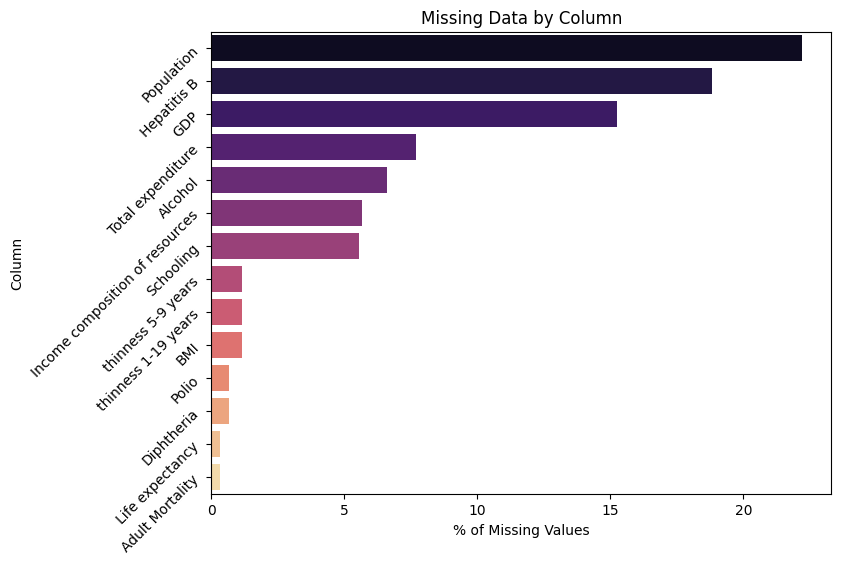

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(
    y='Column', 
    x='Percent',
    data=missing_df.sort_values(by='Percent', ascending=False),
    palette='magma'
)

plt.xlabel('% of Missing Values')
plt.yticks(rotation=45, ha='right')
plt.ylabel('Column')
plt.title('Missing Data by Column')
plt.show()

In [11]:
data[data['Adult Mortality'].isna()]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
608,Cook Islands,2013,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,NaN,NaN,0,0.01,15.606596,87.0,0,87.3,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,NaN,NaN,0,0.01,0.000000,99.0,0,77.3,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,NaN,NaN,0,8.54,0.000000,97.0,0,5.2,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,NaN,NaN,0,0.01,78.281203,9.0,0,79.3,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [12]:
country_counts = data['Country'].value_counts()
single_record_countries = country_counts[country_counts == 1]
single_record_countries

Country
San Marino               1
Cook Islands             1
Marshall Islands         1
Tuvalu                   1
Monaco                   1
Palau                    1
Niue                     1
Nauru                    1
Saint Kitts and Nevis    1
Dominica                 1
Name: count, dtype: int64

Since there was only a single record for all of these countries, these rows were removed from the dataset to avoid potential bias and ensure consistency in the analysis.

In [13]:
data = data[~data['Country'].isin([
    'San Marino', 'Cook Islands', 'Marshall Islands', 'Tuvalu', 'Monaco', 
    'Palau' , 'Niue' ,'Nauru' ,'Saint Kitts and Nevis' ,'Dominica'])]

In [14]:
data[data['Diphtheria'].isna()]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1742,Montenegro,2005,73.6,133.0,0,NaN,527.307672,NaN,0,55.7,...,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,73.5,134.0,0,0.01,57.121901,NaN,0,55.0,...,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,73.5,134.0,0,0.01,495.078296,NaN,0,54.2,...,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,73.4,136.0,0,0.01,36.480240,NaN,0,53.5,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,73.3,136.0,0,0.01,33.669814,NaN,0,52.7,...,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,73.0,144.0,0,0.01,274.547260,NaN,0,51.9,...,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2414,South Sudan,2010,55.0,359.0,27,NaN,0.000000,NaN,0,NaN,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,54.3,369.0,27,NaN,0.000000,NaN,0,NaN,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,53.6,377.0,27,NaN,0.000000,NaN,0,NaN,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,53.1,381.0,27,NaN,0.000000,NaN,0,NaN,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [15]:
data[data['Country'] == 'Montenegro']

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1732,Montenegro,2015,76.1,16.0,0,NaN,0.000000,82.0,0,61.8,...,89.0,NaN,89.0,0.1,6461.192554,622159.0,1.8,1.8,0.804,15.1
1733,Montenegro,2014,75.9,17.0,0,0.01,726.029176,87.0,0,61.3,...,91.0,6.42,91.0,0.1,7378.345289,62181.0,1.8,1.9,0.803,15.1
1734,Montenegro,2013,75.8,19.0,0,0.01,707.144691,9.0,0,6.7,...,94.0,6.43,94.0,0.1,7186.429787,62127.0,1.8,1.9,0.799,15.1
1735,Montenegro,2012,75.6,11.0,0,0.01,648.133178,9.0,0,6.2,...,94.0,7.25,94.0,0.1,6586.719290,6261.0,1.9,1.9,0.797,15.1
1736,Montenegro,2011,75.4,113.0,0,6.56,666.737437,91.0,5,59.7,...,95.0,6.92,95.0,0.1,7318.742449,6279.0,1.9,2.0,0.792,15.1
1737,Montenegro,2010,75.3,115.0,0,6.56,635.484938,9.0,5,59.1,...,93.0,6.90,94.0,0.1,6682.281158,619428.0,2.0,2.0,0.787,15.0
1738,Montenegro,2009,75.0,117.0,0,6.45,489.681870,87.0,0,58.5,...,91.0,6.70,92.0,0.1,6698.794390,618294.0,2.0,2.1,0.785,14.6
1739,Montenegro,2008,74.6,121.0,0,6.17,709.131123,93.0,0,57.8,...,95.0,6.13,95.0,0.1,7325.734740,616969.0,2.1,2.1,0.774,14.2
1740,Montenegro,2007,74.2,125.0,0,4.98,678.518894,9.0,0,57.2,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
1741,Montenegro,2006,73.8,13.0,0,5.38,595.730692,9.0,0,56.5,...,9.0,8.10,9.0,0.1,4383.595970,61525.0,2.2,2.2,0.751,13.2


In [16]:
Montenegro = data[data['Country'] == 'Montenegro']

Montenegro.loc[Montenegro['Hepatitis B'] < 10, 'Hepatitis B'] = Montenegro['Hepatitis B'] * 10
Montenegro['Hepatitis B'].fillna(Montenegro['Hepatitis B'].mean(), inplace=True)

Montenegro.loc[Montenegro['Polio'] < 10, 'Polio'] = Montenegro['Polio'] * 10
Montenegro['Polio'].fillna(Montenegro['Polio'].mean(), inplace=True)

Montenegro.loc[Montenegro['Diphtheria'] < 10, 'Diphtheria'] = Montenegro['Diphtheria'] * 10
Montenegro['Diphtheria'].fillna(Montenegro['Diphtheria'].mean(), inplace=True)

Montenegro.loc[Montenegro['Adult Mortality'] < 20, 'Adult Mortality'] = Montenegro['Adult Mortality'] * 10

Montenegro['Alcohol'].fillna(Montenegro['Alcohol'].mean(), inplace=True)
Montenegro

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/1011464523.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Montenegro['Hepatitis B'].fillna(Montenegro['Hepatitis B'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/1011464523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Monteneg

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1732,Montenegro,2015,76.1,160.0,0,2.584286,0.000000,82.0,0,61.8,...,89.0,NaN,89.0,0.1,6461.192554,622159.0,1.8,1.8,0.804,15.1
1733,Montenegro,2014,75.9,170.0,0,0.010000,726.029176,87.0,0,61.3,...,91.0,6.42,91.0,0.1,7378.345289,62181.0,1.8,1.9,0.803,15.1
1734,Montenegro,2013,75.8,190.0,0,0.010000,707.144691,90.0,0,6.7,...,94.0,6.43,94.0,0.1,7186.429787,62127.0,1.8,1.9,0.799,15.1
1735,Montenegro,2012,75.6,110.0,0,0.010000,648.133178,90.0,0,6.2,...,94.0,7.25,94.0,0.1,6586.719290,6261.0,1.9,1.9,0.797,15.1
1736,Montenegro,2011,75.4,113.0,0,6.560000,666.737437,91.0,5,59.7,...,95.0,6.92,95.0,0.1,7318.742449,6279.0,1.9,2.0,0.792,15.1
1737,Montenegro,2010,75.3,115.0,0,6.560000,635.484938,90.0,5,59.1,...,93.0,6.90,94.0,0.1,6682.281158,619428.0,2.0,2.0,0.787,15.0
1738,Montenegro,2009,75.0,117.0,0,6.450000,489.681870,87.0,0,58.5,...,91.0,6.70,92.0,0.1,6698.794390,618294.0,2.0,2.1,0.785,14.6
1739,Montenegro,2008,74.6,121.0,0,6.170000,709.131123,93.0,0,57.8,...,95.0,6.13,95.0,0.1,7325.734740,616969.0,2.1,2.1,0.774,14.2
1740,Montenegro,2007,74.2,125.0,0,4.980000,678.518894,90.0,0,57.2,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
1741,Montenegro,2006,73.8,130.0,0,5.380000,595.730692,90.0,0,56.5,...,90.0,8.10,90.0,0.1,4383.595970,61525.0,2.2,2.2,0.751,13.2


In [17]:
data.loc[data['Country'] == 'Montenegro', :] = Montenegro

In [18]:
South_Sudan = data[data['Country'] == 'South Sudan']

South_Sudan['Hepatitis B'].fillna(South_Sudan['Hepatitis B'].mean(), inplace=True)
South_Sudan['Diphtheria'].fillna(South_Sudan['Diphtheria'].mean(), inplace=True)

South_Sudan.loc[South_Sudan['Adult Mortality'] < 100, 'Adult Mortality'] = South_Sudan['Adult Mortality'] * 10


South_Sudan.loc[South_Sudan['Polio'] < 10, 'Polio'] = South_Sudan['Polio'] * 10
South_Sudan['Polio'].fillna(South_Sudan['Polio'].mean(), inplace=True)

South_Sudan['Total expenditure'].fillna(South_Sudan['Total expenditure'].mean(), inplace=True)

South_Sudan['BMI'].fillna(data['BMI'].mean(), inplace=True)
South_Sudan['Alcohol'].fillna(data['Alcohol'].mean(), inplace=True)

South_Sudan

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/3615279378.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  South_Sudan['Hepatitis B'].fillna(South_Sudan['Hepatitis B'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/3615279378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  South_

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,57.3,332.0,26,4.613372,0.000000,31.0,878,38.235394,...,41.0,2.71,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,56.6,343.0,26,4.613372,46.074469,31.0,441,38.235394,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,56.4,345.0,26,4.613372,47.444530,31.0,525,38.235394,...,50.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,56.0,347.0,26,4.613372,38.338232,31.0,1952,38.235394,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,55.4,355.0,27,4.613372,0.000000,31.0,1256,38.235394,...,66.0,2.71,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,55.0,359.0,27,4.613372,0.000000,31.0,0,38.235394,...,53.0,2.71,47.0,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,54.3,369.0,27,4.613372,0.000000,31.0,0,38.235394,...,53.0,2.71,47.0,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,53.6,377.0,27,4.613372,0.000000,31.0,0,38.235394,...,53.0,2.71,47.0,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,53.1,381.0,27,4.613372,0.000000,31.0,0,38.235394,...,53.0,2.71,47.0,4.2,NaN,88568.0,NaN,NaN,0.000,0.0
2418,South Sudan,2006,52.5,383.0,28,4.613372,0.000000,31.0,0,38.235394,...,53.0,2.71,47.0,4.1,NaN,8468152.0,NaN,NaN,0.000,0.0


In [19]:
data.loc[data['Country'] == 'South Sudan', :] = South_Sudan

In [20]:
Timor_Leste = data[data['Country'] == 'Timor-Leste'] 

Timor_Leste['Hepatitis B'].fillna(Timor_Leste['Hepatitis B'].mean(), inplace=True)

Timor_Leste.loc[Timor_Leste['Diphtheria'] < 10, 'Diphtheria'] = Timor_Leste['Diphtheria'] * 10
Timor_Leste['Diphtheria'].fillna(Timor_Leste['Diphtheria'].mean(), inplace=True)

Timor_Leste.loc[Timor_Leste['Adult Mortality'] < 100, 'Adult Mortality'] = Timor_Leste['Adult Mortality'] * 10


Timor_Leste.loc[Timor_Leste['Polio'] < 10, 'Polio'] = Timor_Leste['Polio'] * 10
Timor_Leste['Polio'].fillna(Timor_Leste['Polio'].mean(), inplace=True)

Timor_Leste['Total expenditure'].fillna(Timor_Leste['Total expenditure'].mean(), inplace=True)

Timor_Leste['Alcohol'].fillna(Timor_Leste['Alcohol'].mean(), inplace=True)


Timor_Leste

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/2862176449.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Timor_Leste['Hepatitis B'].fillna(Timor_Leste['Hepatitis B'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/2862176449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Timor_

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2601,Timor-Leste,2015,68.3,152.0,2,0.235333,0.000000,76.0,43,17.4,...,75.000000,1.646667,76.000000,0.1,1161.769350,124977.0,1.9,11.1,0.603,12.5
2602,Timor-Leste,2014,68.0,155.0,2,0.010000,28.145785,77.0,47,17.0,...,76.000000,1.480000,77.000000,0.1,1153.515780,1212814.0,1.9,11.1,0.612,12.5
2603,Timor-Leste,2013,67.7,158.0,2,0.010000,3.379875,82.0,4,16.6,...,82.000000,1.290000,82.000000,0.1,117.765674,1184366.0,11.1,11.2,0.620,12.5
2604,Timor-Leste,2012,67.4,159.0,2,0.010000,30.179985,83.0,16,16.2,...,83.000000,1.100000,83.000000,0.1,1117.777240,115676.0,11.2,11.3,0.618,12.5
2605,Timor-Leste,2011,67.2,161.0,2,0.500000,2.726571,67.0,763,15.8,...,66.000000,0.760000,67.000000,0.1,114.561790,1131523.0,11.3,11.4,0.607,12.5
2606,Timor-Leste,2010,66.9,163.0,2,0.100000,38.583766,72.0,50,15.5,...,72.000000,0.920000,72.000000,0.1,849.862697,119591.0,11.5,11.5,0.599,12.4
2607,Timor-Leste,2009,66.6,165.0,2,0.090000,36.199487,72.0,10,15.1,...,78.000000,1.200000,72.000000,0.1,757.311444,19221.0,11.6,11.6,0.599,12.1
2608,Timor-Leste,2008,66.2,168.0,2,0.060000,36.691989,79.0,0,14.7,...,79.000000,0.740000,79.000000,0.1,643.719110,17811.0,11.7,11.7,0.566,11.7
2609,Timor-Leste,2007,65.8,173.0,2,0.050000,11.757669,76.0,0,14.2,...,70.000000,0.370000,70.000000,0.1,524.895936,164973.0,11.8,11.8,0.541,11.3
2610,Timor-Leste,2006,64.9,186.0,2,0.040000,28.125605,76.0,90,13.9,...,62.000000,0.650000,63.000000,0.1,441.532260,148621.0,11.9,11.9,0.511,11.0


In [21]:
data.loc[data['Country'] == 'Timor-Leste', :] = Timor_Leste

In [22]:
data[data['BMI'].isna()]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2457,Sudan,2015,64.1,225.0,58,NaN,0.000000,93.0,3585,NaN,...,93.0,NaN,93.0,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
2458,Sudan,2014,63.8,229.0,59,0.01,253.608651,94.0,676,NaN,...,94.0,8.43,94.0,0.3,2176.898290,37737913.0,NaN,NaN,0.485,7.2
2459,Sudan,2013,63.5,232.0,60,0.01,227.835321,93.0,2813,NaN,...,93.0,8.42,93.0,0.3,1955.667990,36849918.0,NaN,NaN,0.478,7.0
2460,Sudan,2012,63.2,235.0,61,0.01,220.522192,92.0,8523,NaN,...,92.0,8.20,92.0,0.3,1892.894352,3599192.0,NaN,NaN,0.468,6.8
2461,Sudan,2011,62.7,241.0,61,2.12,196.689215,93.0,5616,NaN,...,93.0,8.30,93.0,0.3,1666.857757,35167314.0,NaN,NaN,0.463,7.0
2462,Sudan,2010,62.5,243.0,62,1.77,172.009788,75.0,680,NaN,...,9.0,7.97,9.0,0.3,1476.478870,34385963.0,NaN,NaN,0.461,7.0
2463,Sudan,2009,62.0,248.0,63,1.99,17.053693,72.0,68,NaN,...,81.0,8.40,81.0,0.3,1226.884381,3365619.0,NaN,NaN,0.456,6.8
2464,Sudan,2008,61.8,251.0,64,2.01,128.636271,78.0,129,NaN,...,85.0,8.17,86.0,0.3,1291.528826,32955496.0,NaN,NaN,0.444,6.3
2465,Sudan,2007,61.4,254.0,65,2.01,86.131669,78.0,327,NaN,...,84.0,4.72,84.0,0.3,1115.695200,32282526.0,NaN,NaN,0.440,6.4
2466,Sudan,2006,61.0,26.0,66,1.90,60.336857,6.0,228,NaN,...,77.0,3.93,78.0,0.2,893.879364,316764.0,NaN,NaN,0.430,6.2


In [23]:
Sudan = data[data['Country'] == 'Sudan']

Sudan.loc[Sudan['Adult Mortality'] < 30, 'Adult Mortality'] = Sudan['Adult Mortality'] * 10

Sudan['Alcohol'].fillna(Sudan['Alcohol'].mean(), inplace=True)

Sudan.loc[Sudan['Hepatitis B'] < 10, 'Hepatitis B'] = Sudan['Hepatitis B'] * 10
Sudan['Hepatitis B'].fillna(Sudan['Hepatitis B'].mean(), inplace=True)

Sudan['BMI'].fillna(data['BMI'].mean(), inplace=True)

Sudan['Total expenditure'].fillna(Sudan['Total expenditure'].mean(), inplace=True)

Sudan

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/369288862.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Sudan['Alcohol'].fillna(Sudan['Alcohol'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/369288862.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sudan['Alcohol'].fillna(Suda

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2457,Sudan,2015,64.1,225.0,58,1.458,0.000000,93.000000,3585,38.235394,...,93.0,5.695333,93.0,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
2458,Sudan,2014,63.8,229.0,59,0.010,253.608651,94.000000,676,38.235394,...,94.0,8.430000,94.0,0.3,2176.898290,37737913.0,NaN,NaN,0.485,7.2
2459,Sudan,2013,63.5,232.0,60,0.010,227.835321,93.000000,2813,38.235394,...,93.0,8.420000,93.0,0.3,1955.667990,36849918.0,NaN,NaN,0.478,7.0
2460,Sudan,2012,63.2,235.0,61,0.010,220.522192,92.000000,8523,38.235394,...,92.0,8.200000,92.0,0.3,1892.894352,3599192.0,NaN,NaN,0.468,6.8
2461,Sudan,2011,62.7,241.0,61,2.120,196.689215,93.000000,5616,38.235394,...,93.0,8.300000,93.0,0.3,1666.857757,35167314.0,NaN,NaN,0.463,7.0
2462,Sudan,2010,62.5,243.0,62,1.770,172.009788,75.000000,680,38.235394,...,9.0,7.970000,9.0,0.3,1476.478870,34385963.0,NaN,NaN,0.461,7.0
2463,Sudan,2009,62.0,248.0,63,1.990,17.053693,72.000000,68,38.235394,...,81.0,8.400000,81.0,0.3,1226.884381,3365619.0,NaN,NaN,0.456,6.8
2464,Sudan,2008,61.8,251.0,64,2.010,128.636271,78.000000,129,38.235394,...,85.0,8.170000,86.0,0.3,1291.528826,32955496.0,NaN,NaN,0.444,6.3
2465,Sudan,2007,61.4,254.0,65,2.010,86.131669,78.000000,327,38.235394,...,84.0,4.720000,84.0,0.3,1115.695200,32282526.0,NaN,NaN,0.440,6.4
2466,Sudan,2006,61.0,260.0,66,1.900,60.336857,60.000000,228,38.235394,...,77.0,3.930000,78.0,0.2,893.879364,316764.0,NaN,NaN,0.430,6.2


In [24]:
data.loc[data['Country'] == 'Sudan', :] = Sudan

In [25]:
data[data['thinness 5-9 years'].isna()]

data['thinness 5-9 years'].fillna(data['thinness 5-9 years'].mean(), inplace=True)
data['thinness 1-19 years'].fillna(data['thinness 1-19 years'].mean(), inplace=True)


/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/1871294451.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['thinness 5-9 years'].fillna(data['thinness 5-9 years'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/1871294451.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [26]:
data[data['Schooling'].isna()]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
625,Côte d'Ivoire,2015,53.3,397.0,57,NaN,0.0,83.0,65,28.0,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
626,Côte d'Ivoire,2014,52.8,47.0,58,0.01,0.0,76.0,50,27.4,...,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
627,Côte d'Ivoire,2013,52.3,412.0,59,3.15,0.0,8.0,48,26.8,...,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
628,Côte d'Ivoire,2012,52.0,415.0,59,3.24,0.0,82.0,137,26.2,...,83.0,6.14,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
629,Côte d'Ivoire,2011,51.7,419.0,60,3.13,0.0,62.0,628,25.6,...,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,77.5,111.0,28,8.48,0.0,92.0,37,63.1,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,United States of America,2003,77.2,114.0,28,8.40,0.0,92.0,56,62.4,...,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,United States of America,2002,77.0,115.0,28,8.33,0.0,88.0,41,61.7,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,United States of America,2001,76.9,115.0,28,8.25,0.0,89.0,116,6.9,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


In [27]:
USA = data[data['Country'] == 'United States of America']
USA

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2794,United States of America,2015,79.3,13.0,23,NaN,0.0,92.0,188,69.6,...,93.0,NaN,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2795,United States of America,2014,79.1,14.0,23,8.82,0.0,92.0,667,69.1,...,93.0,17.14,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2796,United States of America,2013,78.9,16.0,23,8.82,0.0,91.0,187,68.6,...,93.0,16.90,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2797,United States of America,2012,78.8,16.0,24,8.82,0.0,9.0,55,68.0,...,93.0,17.20,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2798,United States of America,2011,78.7,16.0,25,8.67,0.0,91.0,220,67.5,...,94.0,17.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2799,United States of America,2010,78.7,15.0,25,8.55,0.0,92.0,63,66.9,...,93.0,17.20,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2800,United States of America,2009,78.5,18.0,26,8.71,0.0,92.0,71,66.3,...,93.0,17.00,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2801,United States of America,2008,78.2,18.0,27,8.74,0.0,94.0,140,65.7,...,94.0,16.20,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2802,United States of America,2007,78.1,11.0,27,8.74,0.0,93.0,43,65.1,...,93.0,15.57,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2803,United States of America,2006,77.8,113.0,28,8.63,0.0,93.0,55,64.4,...,93.0,15.27,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN


In [28]:
usa_population = {2000: 282160000,2001: 284970000,2002: 290100000, 2003: 292800000, 
                  2004: 295500000, 2005: 298400000,2006: 301200000,2007: 304000000, 
                  2008: 306800000, 2009: 309300000, 2010: 311600000,2011: 314000000, 
                  2012: 316300000, 2013: 318600000, 2014: 320900000, 2015: 323100000}

usa_gdp ={
    2000: 36329.97, 2001: 37133.62, 2002: 37997.74,2003: 39490.30,
    2004: 41724.64, 2005: 44123.40, 2006: 46301.99, 2007: 48050.23,
    2008: 48570.06, 2009: 47194.95, 2010: 48650.66, 2011: 50065.98,
    2012: 51784.41, 2013: 53409.75, 2014: 55304.32, 2015: 57040.21}

usa_hdi ={
    2000: 0.894, 2001: 0.895, 2002: 0.896,2003: 0.898,
    2004: 0.902, 2005: 0.904, 2006: 0.908, 2007: 0.911,
    2008: 0.912, 2009: 0.913, 2010: 0.916, 2011: 0.918,
    2012: 0.920, 2013: 0.922, 2014: 0.923, 2015: 0.924}

usa_schooling ={
    2000: 12.96, 2001: 12.93, 2002: 12.89,2003: 12.86,
    2004: 12.83, 2005: 12.83, 2006: 12.91, 2007: 12.95,
    2008: 12.99, 2009: 13.01, 2010: 13.05, 2011: 13.10,
    2012: 13.14, 2013: 13.20, 2014: 13.23, 2015: 13.25}

for year, pop in usa_population.items():
    data.loc[(data['Country'] == 'United States of America') & (data['Year'] == year), 'Population'] = pop

for year, gdp in usa_gdp.items():
    data.loc[(data['Country'] == 'United States of America') & (data['Year'] == year), 'GDP'] = gdp

for year, hdi in usa_hdi.items():
    data.loc[(data['Country'] == 'United States of America') & (data['Year'] == year), 'Income composition of resources'] = hdi

for year, sch in usa_schooling.items():
    data.loc[(data['Country'] == 'United States of America') & (data['Year'] == year), 'Schooling'] = sch

USA = data[(data['Country'] == 'United States of America')]

USA['Total expenditure'].fillna(USA['Total expenditure'].mean(), inplace=True)

USA['Alcohol'].fillna(USA['Alcohol'].mean(), inplace=True)

USA.loc[USA['Adult Mortality'] < 30, 'Adult Mortality'] = USA['Adult Mortality'] * 10
USA.loc[USA['Hepatitis B'] < 10, 'Hepatitis B'] = USA['Hepatitis B'] * 10
USA.loc[USA['BMI'] < 10, 'BMI'] = USA['BMI'] * 10
USA.loc[USA['Polio'] < 10, 'Polio'] = USA['Polio'] * 10


USA

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/517785461.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  USA['Total expenditure'].fillna(USA['Total expenditure'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/517785461.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA['Total

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2794,United States of America,2015,79.3,130.0,23,8.579333,0.0,92.0,188,69.6,...,93.0,15.863333,95.0,0.1,57040.21,323100000.0,0.8,0.6,0.924,13.25
2795,United States of America,2014,79.1,140.0,23,8.820000,0.0,92.0,667,69.1,...,93.0,17.140000,95.0,0.1,55304.32,320900000.0,0.8,0.6,0.923,13.23
2796,United States of America,2013,78.9,160.0,23,8.820000,0.0,91.0,187,68.6,...,93.0,16.900000,94.0,0.1,53409.75,318600000.0,0.7,0.6,0.922,13.20
2797,United States of America,2012,78.8,160.0,24,8.820000,0.0,90.0,55,68.0,...,93.0,17.200000,94.0,0.1,51784.41,316300000.0,0.7,0.6,0.920,13.14
2798,United States of America,2011,78.7,160.0,25,8.670000,0.0,91.0,220,67.5,...,94.0,17.600000,96.0,0.1,50065.98,314000000.0,0.7,0.6,0.918,13.10
2799,United States of America,2010,78.7,150.0,25,8.550000,0.0,92.0,63,66.9,...,93.0,17.200000,95.0,0.1,48650.66,311600000.0,0.7,0.6,0.916,13.05
2800,United States of America,2009,78.5,180.0,26,8.710000,0.0,92.0,71,66.3,...,93.0,17.000000,95.0,0.1,47194.95,309300000.0,0.7,0.6,0.913,13.01
2801,United States of America,2008,78.2,180.0,27,8.740000,0.0,94.0,140,65.7,...,94.0,16.200000,96.0,0.1,48570.06,306800000.0,0.7,0.6,0.912,12.99
2802,United States of America,2007,78.1,110.0,27,8.740000,0.0,93.0,43,65.1,...,93.0,15.570000,96.0,0.1,48050.23,304000000.0,0.7,0.6,0.911,12.95
2803,United States of America,2006,77.8,113.0,28,8.630000,0.0,93.0,55,64.4,...,93.0,15.270000,96.0,0.1,46301.99,301200000.0,0.7,0.6,0.908,12.91


In [29]:
data.loc[data['Country'] == 'USA', :] = USA

In [30]:
data[data['Alcohol'].isna()]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,75.6,19.0,21,NaN,0.0,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,52.4,335.0,66,NaN,0.0,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,0,NaN,0.0,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,76.3,116.0,8,NaN,0.0,94.0,0,62.8,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,74.8,118.0,1,NaN,0.0,94.0,33,54.9,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,9,NaN,0.0,87.0,0,62.1,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,28,NaN,0.0,97.0,256,17.5,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,37,NaN,0.0,69.0,468,41.3,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,27,NaN,0.0,9.0,9,23.4,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [31]:
Algeria = data[data['Country']  == 'Algeria' ]

Algeria.loc[Algeria['Adult Mortality'] < 20, 'Adult Mortality'] = Algeria['Adult Mortality'] * 10


Algeria['Hepatitis B'].fillna(Algeria['Hepatitis B'].mean(), inplace=True)

Algeria.loc[Algeria['Hepatitis B'] < 20, 'Hepatitis B'] = Algeria['Hepatitis B'] * 10

Algeria['Alcohol'].fillna(Algeria['Alcohol'].mean(), inplace=True)

Algeria['Total expenditure'].fillna(Algeria['Total expenditure'].mean(), inplace=True)

Algeria

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/2545172725.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Algeria['Hepatitis B'].fillna(Algeria['Hepatitis B'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/2545172725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Algeria['Hepat

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,75.6,190.0,21,0.406667,0.000000,95.0,63,59.5,...,95.0,4.604,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
33,Algeria,2014,75.4,110.0,21,0.010000,54.237318,95.0,0,58.4,...,95.0,7.210,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013,75.3,112.0,21,0.530000,544.450743,95.0,25,57.2,...,95.0,7.120,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012,75.1,113.0,21,0.660000,555.926083,95.0,18,56.1,...,95.0,6.140,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011,74.9,116.0,21,0.560000,509.002041,95.0,112,55.0,...,95.0,5.290,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010,74.7,119.0,21,0.450000,430.717586,95.0,103,53.9,...,95.0,5.120,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009,74.4,123.0,20,0.500000,352.063642,94.0,107,52.8,...,94.0,5.360,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008,74.1,126.0,20,0.460000,43.087173,91.0,217,51.8,...,92.0,4.200,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007,73.8,129.0,20,0.440000,320.323924,90.0,0,5.8,...,95.0,3.820,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006,73.4,132.0,20,0.360000,270.240196,80.0,944,49.8,...,95.0,3.360,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3


In [32]:
data.loc[data['Country'] == 'Algeria', :] = Algeria

In [33]:
data[data['Alcohol'].isna()]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
48,Angola,2015,52.4,335.0,66,NaN,0.0,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,76.4,13.0,0,NaN,0.0,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,76.3,116.0,8,NaN,0.0,94.0,0,62.8,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,74.8,118.0,1,NaN,0.0,94.0,33,54.9,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
112,Australia,2015,82.8,59.0,1,NaN,0.0,93.0,74,66.6,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,9,NaN,0.0,87.0,0,62.1,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,28,NaN,0.0,97.0,256,17.5,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,37,NaN,0.0,69.0,468,41.3,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,27,NaN,0.0,9.0,9,23.4,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [34]:
Angola = data[data['Country']  == 'Angola' ]

Angola.loc[Angola['Adult Mortality'] < 50, 'Adult Mortality'] = Angola['Adult Mortality'] * 10

Angola.loc[Angola['Polio'] < 10, 'Polio'] = Angola['Polio'] * 10

Angola['Alcohol'].fillna(Angola['Alcohol'].mean(), inplace=True)

Angola['Total expenditure'].fillna(Angola['Total expenditure'].mean(), inplace=True)

Angola['Hepatitis B'].fillna(Angola['Hepatitis B'].mean(), inplace=True)

Angola.loc[Angola['Diphtheria'] < 10, 'Diphtheria'] = Angola['Diphtheria'] * 10

Angola

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/636759188.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Angola['Alcohol'].fillna(Angola['Alcohol'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/636759188.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Angola['Alcohol'].fillna(A

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
48,Angola,2015,52.4,335.0,66,5.740667,0.000000,64.000000,118,23.3,...,70.0,3.919333,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
49,Angola,2014,51.7,348.0,67,8.330000,23.965612,64.000000,11699,22.7,...,68.0,3.310000,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
50,Angola,2013,51.1,355.0,69,8.100000,35.958573,77.000000,8523,22.1,...,67.0,4.260000,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
51,Angola,2012,56.0,358.0,72,8.240000,256.122524,75.000000,4458,21.5,...,75.0,3.300000,75.0,2.6,4598.249988,259615.0,8.8,8.6,0.508,10.3
52,Angola,2011,51.0,361.0,75,8.060000,239.891392,72.000000,1449,21.0,...,73.0,3.380000,71.0,2.5,4299.128890,24218565.0,8.9,8.8,0.495,9.4
53,Angola,2010,49.6,365.0,78,7.800000,191.653741,77.000000,1190,2.4,...,81.0,3.390000,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0
54,Angola,2009,49.1,369.0,81,7.010000,212.922933,61.000000,2807,19.8,...,63.0,4.370000,60.0,2.5,3347.844850,22549547.0,9.3,9.2,0.480,8.5
55,Angola,2008,48.7,371.0,84,7.070000,249.910196,69.000000,265,19.3,...,65.0,3.840000,69.0,2.6,3868.578883,2175942.0,9.5,9.4,0.468,8.1
56,Angola,2007,48.2,375.0,87,6.350000,184.821345,73.000000,1014,18.8,...,75.0,3.380000,73.0,2.6,2878.837144,2997687.0,9.6,9.6,0.454,7.7
57,Angola,2006,47.7,381.0,90,5.840000,25.086888,70.222222,765,18.2,...,36.0,4.540000,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2


In [35]:
data.loc[data['Country'] == 'Angola', :] = Angola

In [36]:
Antigua_and_Barbuda = data[data['Country']  == 'Antigua and Barbuda' ]

Antigua_and_Barbuda.loc[Antigua_and_Barbuda['Adult Mortality'] < 20, 'Adult Mortality'] = Antigua_and_Barbuda['Adult Mortality'] * 10

Antigua_and_Barbuda['Alcohol'].fillna(Antigua_and_Barbuda['Alcohol'].mean(), inplace=True)

Antigua_and_Barbuda['Total expenditure'].fillna(Antigua_and_Barbuda['Total expenditure'].mean(), inplace=True)

Antigua_and_Barbuda['Hepatitis B'].fillna(Antigua_and_Barbuda['Hepatitis B'].mean(), inplace=True)

Antigua_and_Barbuda.loc[Antigua_and_Barbuda['BMI'] < 10, 'BMI'] = Antigua_and_Barbuda['BMI'] * 10

Antigua_and_Barbuda

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/4186096436.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Antigua_and_Barbuda['Alcohol'].fillna(Antigua_and_Barbuda['Alcohol'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/4186096436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
64,Antigua and Barbuda,2015,76.4,130.0,0,7.949333,0.000000,99.000000,0,47.7,...,86.0,4.791333,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,76.2,131.0,0,8.560000,2422.999774,99.000000,0,47.0,...,96.0,5.540000,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,76.1,133.0,0,8.580000,1991.430372,99.000000,0,46.4,...,98.0,5.330000,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,75.9,134.0,0,8.180000,2156.229842,98.000000,0,45.7,...,97.0,5.390000,98.0,0.2,12565.441970,NaN,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,75.7,136.0,0,7.840000,1810.875316,99.000000,0,45.1,...,99.0,5.650000,99.0,0.1,11929.349910,NaN,3.3,3.3,0.782,14.1
69,Antigua and Barbuda,2010,75.6,138.0,0,7.840000,1983.956937,98.000000,0,44.4,...,99.0,5.630000,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1
70,Antigua and Barbuda,2009,75.4,140.0,0,7.820000,149.358735,98.000000,0,43.8,...,98.0,4.860000,99.0,0.1,1312.466920,NaN,3.4,3.3,0.788,14.2
71,Antigua and Barbuda,2008,75.2,142.0,0,8.270000,180.776270,98.000000,0,43.2,...,99.0,4.690000,99.0,0.1,1473.319230,NaN,3.4,3.3,0.786,14.4
72,Antigua and Barbuda,2007,75.0,144.0,0,8.640000,257.966531,97.000000,0,42.6,...,98.0,4.270000,99.0,0.1,14252.294520,NaN,3.4,3.3,0.781,14.5
73,Antigua and Barbuda,2006,74.8,145.0,0,8.930000,216.314694,99.000000,0,42.0,...,99.0,4.340000,99.0,0.1,12724.393770,NaN,3.4,3.4,0.773,14.7


In [37]:
data.loc[data['Country'] == 'Antigua and Barbuda', :] = Antigua_and_Barbuda

In [38]:
data['Alcohol'] = data.groupby('Country')['Alcohol'].transform(lambda x: x.fillna(method='bfill'))

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/3079944820.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Alcohol'] = data.groupby('Country')['Alcohol'].transform(lambda x: x.fillna(method='bfill'))


In [39]:
data[data['Total expenditure'].isna()]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
80,Argentina,2015,76.3,116.0,8,7.93,0.0,94.0,0,62.8,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,74.8,118.0,1,3.91,0.0,94.0,33,54.9,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
112,Australia,2015,82.8,59.0,1,9.71,0.0,93.0,74,66.6,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
128,Austria,2015,81.5,65.0,0,12.32,0.0,93.0,309,57.6,...,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,72.7,118.0,5,0.01,0.0,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,9,6.47,0.0,87.0,0,62.1,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,76.0,127.0,28,4.09,0.0,97.0,256,17.5,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,65.7,224.0,37,0.01,0.0,69.0,468,41.3,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,61.8,33.0,27,0.01,0.0,9.0,9,23.4,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [40]:
data['Total expenditure'] = data.groupby('Country')['Total expenditure'].transform(lambda x: x.fillna(method='bfill'))

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/2277068677.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Total expenditure'] = data.groupby('Country')['Total expenditure'].transform(lambda x: x.fillna(method='bfill'))


In [41]:
data[data['Hepatitis B'].isna()]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
94,Argentina,2001,74.0,138.0,12,7.76,123.012867,NaN,0,54.6,...,85.0,9.38,83.0,0.1,717.694674,3747159.0,1.2,1.1,0.771,15.6
95,Argentina,2000,74.1,137.0,12,7.68,1349.025282,NaN,6,54.0,...,88.0,9.21,83.0,0.1,7669.273916,3757452.0,1.2,1.1,0.764,15.0
127,Australia,2000,79.5,78.0,1,10.17,347.187360,NaN,108,58.2,...,9.0,8.80,9.0,0.1,2169.921000,19153.0,0.7,0.7,0.897,20.4
158,Azerbaijan,2001,67.5,151.0,8,0.51,4.104190,NaN,574,42.6,...,77.0,4.48,77.0,0.1,73.683843,81112.0,3.1,3.1,0.642,10.4
159,Azerbaijan,2000,66.6,16.0,9,0.65,35.094626,NaN,210,42.1,...,75.0,4.67,76.0,0.1,655.974326,8486.0,3.2,3.1,0.636,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zambia,2004,47.9,578.0,36,2.46,8.369852,NaN,35,18.0,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003,46.4,64.0,39,2.33,65.789974,NaN,881,17.6,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,45.5,69.0,41,2.44,54.043480,NaN,25036,17.3,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,44.6,611.0,43,2.61,46.830275,NaN,16997,17.1,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8


In [42]:
data['Hepatitis B'] = data.groupby('Country')['Hepatitis B'].transform(lambda x: x.fillna(x.mean()))
data['Total expenditure'] = data.groupby('Country')['Total expenditure'].transform(lambda x: x.fillna(x.mean()))
data['GDP'] = data.groupby('Country')['GDP'].transform(lambda x: x.fillna(x.mean()))
data['Population'] = data.groupby('Country')['Population'].transform(lambda x: x.fillna(x.mean()))

In [43]:
data = data[data['Country'] != "Democratic People's Republic of Korea"]

In [183]:
Somalia = data[data['Country']  == 'Somalia' ]

Somalia_population = {2000: 8838713, 2001: 9198493,2002: 9550063, 2003: 9909157, 
                  2004: 10280998, 2005: 10644228,2006: 10975502, 2007: 11322582, 
                  2008: 11663084, 2009: 11961201, 2010: 12261756,2011: 12348830, 
                  2012: 12461160, 2013: 12869594, 2014: 13339491, 2015: 13806963}

Somalia_Total_expenditure = {
2015:	2.84,
2014:	2.72,
2013:	2.82
}

for year, pop in Somalia_population.items():
    data.loc[(data['Country'] == 'Somalia') & (data['Year'] == year), 'Population'] = pop

for year, exp in Somalia_Total_expenditure.items():
    data.loc[(data['Country'] == 'Somalia') & (data['Year'] == year), 'Total expenditure'] = exp

Somalia['Total expenditure'].fillna(Somalia['Total expenditure'].mean(), inplace=True)

Somalia

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/1550106612.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Somalia['Total expenditure'].fillna(Somalia['Total expenditure'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/1550106612.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2377,Somalia,2015,55.0,312.0,50,0.01,0.0,42.0,7497,24.3,...,47.0,2.840000,42.0,0.7,426.985370,13806963.0,6.6,6.4,NaN,NaN
2378,Somalia,2014,54.3,321.0,51,0.01,0.0,42.0,10229,23.8,...,47.0,2.720000,42.0,0.8,417.891430,13339491.0,6.7,6.5,NaN,NaN
2379,Somalia,2013,54.2,318.0,51,0.01,0.0,42.0,3173,23.3,...,47.0,2.820000,42.0,0.8,47.543235,12869594.0,6.8,6.6,NaN,NaN
2380,Somalia,2012,53.1,336.0,51,0.01,0.0,42.0,9983,22.9,...,47.0,2.793333,42.0,0.8,297.473345,12461160.0,6.8,6.7,NaN,NaN
2381,Somalia,2011,53.1,329.0,51,0.01,0.0,42.0,17298,22.4,...,49.0,2.793333,41.0,0.8,297.473345,12348830.0,6.9,6.7,NaN,NaN
2382,Somalia,2010,52.4,336.0,52,0.01,0.0,42.0,115,22.0,...,49.0,2.793333,45.0,0.8,297.473345,12261756.0,7.0,6.8,NaN,NaN
2383,Somalia,2009,52.2,335.0,52,0.01,0.0,42.0,13,21.5,...,41.0,2.793333,42.0,0.8,297.473345,11961201.0,7.1,6.9,NaN,NaN
2384,Somalia,2008,51.9,336.0,52,0.01,0.0,42.0,1081,21.1,...,4.0,2.793333,31.0,0.9,297.473345,11663084.0,7.2,7.0,NaN,NaN
2385,Somalia,2007,51.5,34.0,52,0.01,0.0,42.0,1149,2.7,...,4.0,2.793333,4.0,0.9,297.473345,11322582.0,7.3,7.1,NaN,NaN
2386,Somalia,2006,51.5,337.0,51,0.01,0.0,42.0,7,2.2,...,26.0,2.793333,26.0,0.9,297.473345,10975502.0,7.4,7.2,NaN,NaN


In [185]:
data.loc[data['Country'] == 'Somalia', :] = Somalia

In [49]:
Yemen = data[data['Country']  == 'Yemen' ]

Yemen_pop = {2000: 19624141, 2001: 20226147,2002: 20835086, 2003: 21456379, 
                  2004: 22095167, 2005: 22790085,2006: 23543083, 2007: 24318082, 
                  2008: 25111941, 2009: 25927724, 2010: 26754387,2011: 27582897, 
                  2012: 28433647, 2013: 29312952, 2014: 30226309, 2015: 31159379}

Yemen_gdp ={
    2000: 493.24, 2001: 487.14, 2002: 513.24,2003: 548.91,
    2004: 627.63, 2005: 734.16, 2006: 809.71, 2007: 890.31,
    2008: 1071.64, 2009: 969.24, 2010: 1155.2, 2011: 1186.48,
    2012: 1245.05, 2013: 1378.75, 2014: 1430.16, 2015: 1362.17}

for year, gdp in Yemen_gdp.items():
    data.loc[(data['Country'] == 'Yemen') & (data['Year'] == year), 'GDP'] = gdp
    
for year, pop in Yemen_pop.items():
    data.loc[(data['Country'] == 'Yemen') & (data['Year'] == year), 'Population'] = pop

Yemen

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2890,Yemen,2015,65.7,224.0,37,0.01,0.0,69.0,468,41.3,...,63.0,5.64,69.0,0.1,1362.17,31159379.0,13.6,13.4,0.499,9.0
2891,Yemen,2014,65.4,228.0,37,0.01,0.0,73.0,815,4.4,...,67.0,5.64,73.0,0.1,1430.16,30226309.0,13.7,13.5,0.500,9.0
2892,Yemen,2013,65.4,226.0,36,0.04,0.0,73.0,400,39.6,...,67.0,5.78,73.0,0.1,1378.75,29312952.0,13.7,13.5,0.498,9.0
2893,Yemen,2012,64.7,236.0,36,0.04,0.0,67.0,2177,38.7,...,68.0,5.73,67.0,0.1,1245.05,28433647.0,13.7,13.6,0.494,9.0
2894,Yemen,2011,64.6,234.0,35,0.04,0.0,69.0,2676,37.9,...,69.0,5.40,69.0,0.1,1186.48,27582897.0,13.7,13.6,0.493,8.6
2895,Yemen,2010,64.4,233.0,35,0.06,0.0,76.0,510,37.2,...,77.0,5.17,76.0,0.1,1155.20,26754387.0,13.7,13.7,0.488,8.5
2896,Yemen,2009,64.1,235.0,36,0.03,0.0,76.0,130,36.4,...,76.0,5.32,76.0,0.1,969.24,25927724.0,13.8,13.7,0.483,8.4
2897,Yemen,2008,63.8,238.0,37,0.04,0.0,78.0,7,35.7,...,78.0,5.12,78.0,0.1,1071.64,25111941.0,13.8,13.7,0.480,8.5
2898,Yemen,2007,63.4,24.0,38,0.05,0.0,79.0,13,35.1,...,79.0,4.92,79.0,0.1,890.31,24318082.0,13.8,13.8,0.477,8.6
2899,Yemen,2006,63.0,242.0,39,0.04,0.0,78.0,8079,34.5,...,78.0,4.82,78.0,0.1,809.71,23543083.0,13.9,13.8,0.475,8.7


In [50]:
data.loc[data['Country'] == 'Yemen', :] = Yemen

In [53]:
Viet_Nam = data[data['Country']  == 'Viet Nam' ]

Viet_Nam_pop = {2000: 77154011, 2001: 77969361,2002: 78772224, 2003: 79563777, 
                  2004: 80338971, 2005: 81088313,2006: 82167897, 2007: 83633375, 
                  2008: 85175788, 2009: 86460018, 2010: 87455152,2011: 88468314, 
                  2012: 89510356, 2013: 90573104, 2014: 91679578, 2015: 92823254}

Viet_Nam_gdp ={
    2000: 404.03, 2001: 419.21, 2002: 445.13,2003: 497.12,
    2004: 565.45, 2005: 710.75, 2006: 807.76, 2007: 925.64,
    2008: 1163.83, 2009: 1226.17, 2010: 1683.16, 2011: 1950.93,
    2012: 2185.12, 2013: 2359.52, 2014: 2546.38, 2015: 2577.57}

for year, gdp in Viet_Nam_gdp.items():
    data.loc[(data['Country'] == 'Viet Nam') & (data['Year'] == year), 'GDP'] = gdp
    
for year, pop in Viet_Nam_pop.items():
    data.loc[(data['Country'] == 'Viet Nam') & (data['Year'] == year), 'Population'] = pop

Viet_Nam

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2874,Viet Nam,2015,76.0,127.0,28,4.09,0.0,97.000000,256,17.5,...,97.0,7.70,97.0,0.1,2577.57,92823254.0,14.2,14.5,0.678,12.6
2875,Viet Nam,2014,75.9,128.0,28,4.09,0.0,95.000000,15033,16.7,...,96.0,7.70,95.0,0.1,2546.38,91679578.0,14.3,14.7,0.675,12.5
2876,Viet Nam,2013,75.7,129.0,28,4.00,0.0,59.000000,1123,16.0,...,93.0,7.17,59.0,0.1,2359.52,90573104.0,14.3,14.9,0.668,12.3
2877,Viet Nam,2012,75.6,13.0,29,4.12,0.0,97.000000,578,15.3,...,97.0,6.96,97.0,0.1,2185.12,89510356.0,14.4,15.0,0.662,12.2
2878,Viet Nam,2011,75.4,131.0,29,3.94,0.0,95.000000,750,14.7,...,96.0,6.20,95.0,0.1,1950.93,88468314.0,14.4,15.2,0.655,12.0
2879,Viet Nam,2010,75.2,133.0,29,3.93,0.0,88.000000,2809,14.0,...,94.0,6.36,93.0,0.1,1683.16,87455152.0,14.5,15.4,0.647,11.9
2880,Viet Nam,2009,75.0,134.0,29,3.86,0.0,94.000000,6582,13.4,...,97.0,6.40,96.0,0.1,1226.17,86460018.0,14.6,15.5,0.641,11.7
2881,Viet Nam,2008,74.9,135.0,28,3.58,0.0,87.000000,352,12.9,...,93.0,5.53,93.0,0.2,1163.83,85175788.0,14.7,15.7,0.633,11.6
2882,Viet Nam,2007,74.7,136.0,28,3.01,0.0,67.000000,17,12.3,...,92.0,6.90,92.0,0.2,925.64,83633375.0,14.9,15.8,0.625,11.4
2883,Viet Nam,2006,74.6,136.0,28,2.56,0.0,93.000000,1978,11.8,...,94.0,5.56,94.0,0.2,807.76,82167897.0,15.1,15.9,0.618,11.3


In [54]:
data.loc[data['Country'] == 'Viet Nam', :] = Viet_Nam

In [56]:
AB = data[data['Country']  == 'Antigua and Barbuda' ]


AB_pop = {2015:	89409,2014:	88765,2013:	88064,2012:	87260,
        2011:	86332,2010:	85320,2009:	84173,2008:	82912,
        2007:	81704,2006:	80604,2005:	79611,2004:	78719,
        2003:	77884,2002:	77032,2001:	76069,2000:	74912}


AB_gdp ={2015:	16080.66,2014:	15533.48,2013:	15050.71,2012:	15208.66,
        2011:	14841.97,2010:	15216.31,2009:	16471.37,2008:	18785.47,
        2007:	18203.52,2006:	16172.25,2005:	14366.29,2004:	13036.01,
        2003:	12171.38,2002:	11657.35,2001:	11535.77,2000:	12021.46}

for year, gdp in AB_gdp.items():
        data.loc[(data['Country'] == 'Antigua and Barbuda') & (data['Year'] == year), 'GDP'] = gdp
    
for year, pop in AB_pop.items():
        data.loc[(data['Country'] == 'Antigua and Barbuda') & (data['Year'] == year), 'Population'] = pop

AB

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
64,Antigua and Barbuda,2015,76.4,130.0,0,7.949333,0.000000,99.000000,0,47.7,...,86.0,4.791333,99.0,0.2,16080.66,89409.0,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,76.2,131.0,0,8.560000,2422.999774,99.000000,0,47.0,...,96.0,5.540000,99.0,0.2,15533.48,88765.0,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,76.1,133.0,0,8.580000,1991.430372,99.000000,0,46.4,...,98.0,5.330000,99.0,0.2,15050.71,88064.0,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,75.9,134.0,0,8.180000,2156.229842,98.000000,0,45.7,...,97.0,5.390000,98.0,0.2,15208.66,87260.0,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,75.7,136.0,0,7.840000,1810.875316,99.000000,0,45.1,...,99.0,5.650000,99.0,0.1,14841.97,86332.0,3.3,3.3,0.782,14.1
69,Antigua and Barbuda,2010,75.6,138.0,0,7.840000,1983.956937,98.000000,0,44.4,...,99.0,5.630000,98.0,0.1,15216.31,85320.0,3.3,3.3,0.783,14.1
70,Antigua and Barbuda,2009,75.4,140.0,0,7.820000,149.358735,98.000000,0,43.8,...,98.0,4.860000,99.0,0.1,16471.37,84173.0,3.4,3.3,0.788,14.2
71,Antigua and Barbuda,2008,75.2,142.0,0,8.270000,180.776270,98.000000,0,43.2,...,99.0,4.690000,99.0,0.1,18785.47,82912.0,3.4,3.3,0.786,14.4
72,Antigua and Barbuda,2007,75.0,144.0,0,8.640000,257.966531,97.000000,0,42.6,...,98.0,4.270000,99.0,0.1,18203.52,81704.0,3.4,3.3,0.781,14.5
73,Antigua and Barbuda,2006,74.8,145.0,0,8.930000,216.314694,99.000000,0,42.0,...,99.0,4.340000,99.0,0.1,16172.25,80604.0,3.4,3.4,0.773,14.7


In [57]:
data.loc[data['Country'] == 'Antigua and Barbuda', :] = AB

In [59]:
Bahamas = data[data['Country']  == 'Bahamas' ]


Bahamas_pop ={
2015:	385346,
2014:	382298,
2013:	378953,
2012:	375469,
2011:	371729,
2010:	367478,
2009:	362810,
2008:	358120,
2007:	353334,
2006:	348375,
2005:	343894,
2004:	339782,
2003:	335618,
2002:	331614,
2001:	327836,
2000:	323835
}


Bahamas_gdp = {
2015:	30289.4,
2014:	28705.62,
2013:	27432.95,
2012:	28552.02,
2011:	27090.84,
2010:	27473.1,
2009:	27512.91,
2008:	29392.38,
2007:	30051.85,
2006:	29184.79,
2005:	28602.42,
2004:	26650.29,
2003:	26429.12,
2002:	26781.62,
2001:	25371.92,
2000:	24940.08
}


for year, gdp in Bahamas_gdp.items():
        data.loc[(data['Country'] == 'Bahamas') & (data['Year'] == year), 'GDP'] = gdp
    
for year, pop in Bahamas_pop.items():
        data.loc[(data['Country'] == 'Bahamas') & (data['Year'] == year), 'Population'] = pop

Bahamas

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
160,Bahamas,2015,76.1,147.0,0,9.45,0.0,95.0,0,64.5,...,95.0,7.74,95.0,0.1,30289.40,385346.0,2.5,2.5,0.790,12.6
161,Bahamas,2014,75.4,16.0,0,9.45,0.0,96.0,0,63.8,...,96.0,7.74,96.0,0.1,28705.62,382298.0,2.5,2.5,0.789,12.6
162,Bahamas,2013,74.8,172.0,0,9.42,0.0,97.0,0,63.2,...,97.0,7.50,97.0,0.1,27432.95,378953.0,2.5,2.5,0.790,12.6
163,Bahamas,2012,74.9,167.0,0,9.50,0.0,96.0,0,62.6,...,99.0,7.43,98.0,0.2,28552.02,375469.0,2.5,2.5,0.789,12.6
164,Bahamas,2011,75.0,162.0,0,9.34,0.0,95.0,0,62.0,...,97.0,7.63,98.0,0.1,27090.84,371729.0,2.5,2.5,0.788,12.6
165,Bahamas,2010,75.0,161.0,0,9.19,0.0,98.0,0,61.3,...,97.0,7.44,99.0,0.2,27473.10,367478.0,2.5,2.5,0.788,12.6
166,Bahamas,2009,74.6,168.0,0,9.29,0.0,95.0,0,6.7,...,97.0,7.43,96.0,0.1,27512.91,362810.0,2.5,2.5,0.791,12.6
167,Bahamas,2008,74.5,167.0,0,10.15,0.0,9.0,0,6.1,...,93.0,7.30,93.0,0.1,29392.38,358120.0,2.5,2.5,0.791,12.6
168,Bahamas,2007,74.4,167.0,0,10.75,0.0,93.0,0,59.4,...,95.0,7.80,95.0,0.1,30051.85,353334.0,2.5,2.5,0.790,12.5
169,Bahamas,2006,74.2,171.0,0,11.07,0.0,96.0,0,58.7,...,94.0,6.93,95.0,0.1,29184.79,348375.0,2.5,2.5,0.788,12.4


In [60]:
data.loc[data['Country'] == 'Bahamas', :] = Bahamas

In [62]:

Bahrain = data[data['Country']  == 'Bahrain' ]


Bahrain_pop ={
2015:	1370322,
2014:	1314562,
2013:	1253191,
2012:	1208964,
2011:	1195020,
2010:	1228543,
2009:	1178415,
2008:	1103496,
2007:	1039295,
2006:	960424,
2005:	888822,
2004:	823741,
2003:	764517,
2002:	710553,
2001:	661316,
2000:	637582
}

    
for year, pop in Bahrain_pop.items():
        data.loc[(data['Country'] == 'Bahrain') & (data['Year'] == year), 'Population'] = pop

Bahrain

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
176,Bahrain,2015,76.9,69.0,0,1.57,0.000000,98.0,0,63.6,...,98.0,4.98,98.0,0.1,22688.87824,1370322.0,6.2,6.1,0.823,14.5
177,Bahrain,2014,76.8,7.0,0,1.57,367.255674,98.0,46,62.9,...,98.0,4.98,98.0,0.1,24983.37920,1314562.0,6.1,6.0,0.820,14.5
178,Bahrain,2013,76.7,7.0,0,1.65,3.968696,99.0,0,62.2,...,99.0,4.69,99.0,0.1,251.18329,1253191.0,6.1,6.0,0.815,14.5
179,Bahrain,2012,76.5,71.0,0,1.70,2211.215778,99.0,0,61.5,...,99.0,4.37,99.0,0.1,23649.36661,1208964.0,6.1,6.0,0.812,14.5
180,Bahrain,2011,76.1,76.0,0,1.66,197.773468,99.0,0,6.8,...,99.0,3.40,99.0,0.1,2281.12420,1195020.0,6.1,6.0,0.812,14.4
181,Bahrain,2010,76.1,73.0,0,1.93,266.769612,99.0,0,6.1,...,99.0,3.64,99.0,0.1,2722.13890,1228543.0,6.0,5.9,0.810,14.4
182,Bahrain,2009,76.0,74.0,0,1.95,332.934765,98.0,3,59.3,...,97.0,3.79,98.0,0.1,19356.67236,1178415.0,6.0,5.9,0.814,14.4
183,Bahrain,2008,75.8,76.0,0,2.00,231.547891,97.0,2,58.5,...,97.0,3.17,97.0,0.1,2367.56535,1103496.0,6.0,5.9,0.815,14.4
184,Bahrain,2007,75.6,77.0,0,2.00,278.360281,97.0,7,57.6,...,97.0,3.80,97.0,0.1,2977.11530,1039295.0,6.1,5.9,0.813,14.4
185,Bahrain,2006,75.5,79.0,0,2.10,170.737403,98.0,3,56.8,...,98.0,3.80,98.0,0.1,1937.99549,960424.0,6.1,5.9,0.810,14.2


In [63]:
data.loc[data['Country'] == 'Bahrain', :] = Bahrain

In [65]:

Barbados = data[data['Country']  == 'Barbados' ]


Barbados_pop ={
2015:	278990,
2014:	278348,
2013:	277665,
2012:	276938,
2011:	276139,
2010:	275243,
2009:	274123,
2008:	272714,
2007:	271288,
2006:	270002,
2005:	268706,
2004:	267298,
2003:	265776,
2002:	264148,
2001:	262425,
2000:	262063
}

    
for year, pop in Barbados_pop.items():
        data.loc[(data['Country'] == 'Barbados') & (data['Year'] == year), 'Population'] = pop

Barbados

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
208,Barbados,2015,75.5,98.0,0,8.82,0.000000,97.000000,0,54.5,...,97.0,7.47,97.0,0.1,15557.83810,278990.0,3.8,3.7,0.794,15.3
209,Barbados,2014,75.4,1.0,0,8.82,294.905658,94.000000,0,53.7,...,95.0,7.47,94.0,0.1,15359.66971,278348.0,3.8,3.7,0.793,15.3
210,Barbados,2013,75.2,11.0,0,8.74,263.037284,91.000000,0,53.0,...,91.0,7.57,91.0,0.1,15472.78140,277665.0,3.8,3.8,0.792,15.3
211,Barbados,2012,75.1,12.0,0,8.61,260.004386,87.000000,0,52.2,...,88.0,7.43,87.0,0.1,15384.87490,276938.0,3.8,3.8,0.785,15.3
212,Barbados,2011,74.9,14.0,0,8.51,173.982563,91.000000,0,51.4,...,91.0,6.67,91.0,0.1,15534.15740,276139.0,3.8,3.8,0.780,15.5
213,Barbados,2010,74.7,16.0,0,8.41,154.963086,86.000000,0,5.7,...,9.0,6.17,86.0,0.1,1595.91232,275243.0,3.8,3.8,0.781,15.8
214,Barbados,2009,74.6,19.0,0,8.46,327.161813,93.000000,0,49.9,...,93.0,6.21,93.0,0.1,16523.32388,274123.0,3.8,3.8,0.779,15.5
215,Barbados,2008,74.4,111.0,0,8.95,25.522771,85.000000,0,49.2,...,85.0,6.10,85.0,0.1,1657.32280,272714.0,3.9,3.9,0.775,15.3
216,Barbados,2007,74.2,113.0,0,8.47,1641.309810,93.000000,0,48.4,...,93.0,5.64,93.0,0.1,16462.48556,271288.0,3.9,3.9,0.771,15.0
217,Barbados,2006,74.1,115.0,0,8.39,181.500086,84.000000,0,47.7,...,85.0,5.27,84.0,0.1,15646.55910,270002.0,4.0,3.9,0.766,14.8


In [66]:
data.loc[data['Country'] == 'Bahrain', :] = Bahrain

In [68]:
Bolivia = data[data['Country']  == 'Bolivia (Plurinational State of)' ]


Bolivia_pop ={
2015:	11014705,
2014:	10848888,
2013:	10682608,
2012:	10515807,
2011:	10348929,
2010:	10182345,
2009:	10016275,
2008:	9850858,
2007:	9685960,
2006:	9521689,
2005:	9360754,
2004:	9204287,
2003:	9050700,
2002:	8900355,
2001:	8752736,
2000:	8606326
}

Bolivia_gdp ={
2015:	2996.01,
2014:	3041.44,
2013:	2870.02,
2012:	2575.6,
2011:	2315.52,
2010:	1929.78,
2009:	1731.18,
2008:	1692.67,
2007:	1354.55,
2006:	1202.71,
2005:	1020.12,
2004:	953.19,
2003:	893.01,
2002:	888.22,
2001:	930.17,
2000:	975.78
}

    
for year, pop in Bolivia_pop.items():
        data.loc[(data['Country'] == 'Bolivia (Plurinational State of)') & (data['Year'] == year), 'Population'] = pop

for year, gdp in Bolivia_gdp.items():
        data.loc[(data['Country'] == 'Bolivia (Plurinational State of)') & (data['Year'] == year), 'GDP'] = gdp


Bolivia

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
304,Bolivia (Plurinational State of),2015,77.0,186.0,8,3.62,0.0,99.0,0,52.6,...,99.0,6.33,99.0,0.1,2996.01,11014705.0,1.2,1.1,0.671,13.8
305,Bolivia (Plurinational State of),2014,74.0,189.0,8,3.62,0.0,98.0,0,51.9,...,99.0,6.33,98.0,0.1,3041.44,10848888.0,1.2,1.1,0.666,13.8
306,Bolivia (Plurinational State of),2013,71.0,192.0,8,3.78,0.0,94.0,0,51.2,...,95.0,5.96,94.0,0.1,2870.02,10682608.0,1.2,1.1,0.661,13.8
307,Bolivia (Plurinational State of),2012,69.8,194.0,8,3.89,0.0,93.0,0,5.6,...,93.0,5.56,93.0,0.1,2575.60,10515807.0,1.2,1.1,0.655,13.8
308,Bolivia (Plurinational State of),2011,69.3,198.0,9,3.93,0.0,95.0,0,49.9,...,95.0,5.49,95.0,0.2,2315.52,10348929.0,1.2,1.1,0.649,13.8
309,Bolivia (Plurinational State of),2010,68.7,22.0,9,3.95,0.0,91.0,0,49.3,...,9.0,5.44,91.0,0.2,1929.78,10182345.0,1.2,1.1,0.643,13.8
310,Bolivia (Plurinational State of),2009,68.0,27.0,10,3.87,0.0,93.0,0,48.6,...,92.0,5.76,93.0,0.2,1731.18,10016275.0,1.2,1.1,0.636,13.8
311,Bolivia (Plurinational State of),2008,67.4,211.0,10,3.77,0.0,88.0,0,48.0,...,87.0,5.00,88.0,0.2,1692.67,9850858.0,1.3,1.1,0.632,14.0
312,Bolivia (Plurinational State of),2007,66.8,216.0,11,3.47,0.0,84.0,0,47.3,...,85.0,4.96,84.0,0.2,1354.55,9685960.0,1.3,1.2,0.626,14.1
313,Bolivia (Plurinational State of),2006,66.2,219.0,11,3.23,0.0,83.0,0,46.7,...,82.0,5.19,83.0,0.2,1202.71,9521689.0,1.3,1.2,0.625,14.3


In [69]:
data.loc[data['Country'] == 'Bolivia (Plurinational State of)', :] = Bolivia

In [71]:
BD = data[data['Country']  == 'Brunei Darussalam' ]

BD_pop ={
2015:	422212,
2014:	416750,
2013:	411202,
2012:	405557,
2011:	399389,
2010:	392332,
2009:	384952,
2008:	377793,
2007:	370873,
2006:	364663,
2005:	358916,
2004:	352911,
2003:	346637,
2002:	340099,
2001:	333345,
2000:	326424
}

for year, pop in BD_pop.items():
        data.loc[(data['Country'] == 'Brunei Darussalam') & (data['Year'] == year), 'Population'] = pop


BD

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
368,Brunei Darussalam,2015,77.7,78.0,0,0.01,0.000000,99.0,4,41.2,...,99.0,2.65,99.0,0.1,3967.89510,422212.0,5.7,5.1,0.864,14.9
369,Brunei Darussalam,2014,77.6,8.0,0,0.01,269.143278,99.0,1,4.2,...,99.0,2.65,99.0,0.1,4159.86520,416750.0,5.7,5.2,0.863,15.0
370,Brunei Darussalam,2013,77.1,84.0,0,0.01,2845.306444,98.0,0,39.2,...,99.0,2.61,99.0,0.1,44597.27968,411202.0,5.8,5.2,0.860,14.9
371,Brunei Darussalam,2012,78.3,79.0,0,0.01,3192.634413,99.0,1,38.2,...,99.0,2.30,99.0,0.1,47651.25990,405557.0,5.8,5.3,0.852,14.4
372,Brunei Darussalam,2011,77.4,79.0,0,0.97,295.773017,93.0,4,37.2,...,99.0,2.25,97.0,0.1,4717.27300,399389.0,5.9,5.4,0.846,14.1
373,Brunei Darussalam,2010,76.9,79.0,0,0.88,2218.364226,96.0,0,36.2,...,99.0,2.73,95.0,0.1,35268.11170,392332.0,5.9,5.4,0.845,14.2
374,Brunei Darussalam,2009,76.8,88.0,0,0.25,1873.686852,96.0,2,35.2,...,99.0,2.85,99.0,0.1,27965.47540,384952.0,6.0,5.5,0.841,14.1
375,Brunei Darussalam,2008,77.2,84.0,0,0.67,2538.941033,96.0,3,34.2,...,97.0,2.23,98.0,0.1,37951.28600,377793.0,6.1,5.6,0.840,14.2
376,Brunei Darussalam,2007,76.0,1.0,0,0.85,2048.557422,97.0,0,33.2,...,95.0,2.32,99.0,0.1,32672.36717,370873.0,6.2,5.7,0.840,14.3
377,Brunei Darussalam,2006,76.3,93.0,0,0.67,24.975329,99.0,0,32.2,...,94.0,2.24,97.0,0.1,398.96692,364663.0,6.3,5.8,0.837,14.3


In [72]:
data.loc[data['Country'] == 'Brunei Darussalam', :] = BD

In [74]:
Congo = data[data['Country']  == 'Congo' ]

Congo_pop ={
    2000: 3200_000,
    2001: 3273537,
    2002: 3350771,
    2003: 3445753,
    2004: 3565554,
    2005: 3696393,
    2006: 3837409,
    2007: 3980430,
    2008: 4090517,
    2009: 4257000,
    2010: 4438000,
    2011: 4584000,
    2012: 4713000,
    2013: 4828000,
    2014: 4945000,
    2015: 5064000
}

Congo_gdp ={
    2000: 3870,  
    2001: 3270, 
    2002: 3400,
    2003: 3500,
    2004: 3566,
    2005: 3897,  
    2006: 4178,  
    2007: 3863, 
    2008: 4049,  
    2009: 4369,  
    2010: 4664, 
    2011: 4710, 
    2012: 5130,  
    2013: 5057, 
    2014: 5361, 
    2015: 5095 
}


for year, pop in Congo_pop.items():
        data.loc[(data['Country'] == 'Congo') & (data['Year'] == year), 'Population'] = pop

for year, gdp in Congo_gdp.items():
        data.loc[(data['Country'] == 'Congo') & (data['Year'] == year), 'GDP'] = gdp


Congo

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
592,Congo,2015,64.7,267.0,7,0.01,0.0,8.000000,1359,27.4,...,8.0,5.15,8.0,2.8,5095.0,5064000.0,7.5,7.1,0.590,11.1
593,Congo,2014,64.2,275.0,7,0.01,0.0,9.000000,71,26.8,...,9.0,5.15,9.0,3.0,5361.0,4945000.0,7.6,7.3,0.581,11.1
594,Congo,2013,63.9,274.0,7,0.01,0.0,85.000000,124,26.2,...,85.0,5.90,85.0,3.0,5057.0,4828000.0,7.7,7.4,0.576,11.1
595,Congo,2012,63.7,273.0,7,0.01,0.0,62.000000,260,25.6,...,61.0,3.98,85.0,3.3,5130.0,4713000.0,7.9,7.5,0.557,10.2
596,Congo,2011,62.9,285.0,7,3.82,0.0,7.000000,315,25.0,...,69.0,2.79,82.0,3.5,4710.0,4584000.0,8.0,7.6,0.558,10.7
597,Congo,2010,62.0,298.0,7,3.53,0.0,74.000000,4,24.5,...,72.0,2.29,74.0,3.8,4664.0,4438000.0,8.1,7.7,0.548,10.5
598,Congo,2009,68.0,314.0,7,3.47,0.0,75.000000,1,23.9,...,76.0,2.27,78.0,4.0,4369.0,4257000.0,8.3,7.9,0.545,10.3
599,Congo,2008,59.4,338.0,8,2.58,0.0,73.000000,2,23.3,...,77.0,2.90,79.0,4.3,4049.0,4090517.0,8.4,8.0,0.527,10.0
600,Congo,2007,58.2,354.0,8,2.75,0.0,64.000000,84,22.8,...,71.0,2.54,72.0,5.0,3863.0,3980430.0,8.5,8.2,0.517,9.8
601,Congo,2006,56.9,368.0,8,2.25,0.0,50.777778,126,22.3,...,73.0,2.37,73.0,5.5,4178.0,3837409.0,8.7,8.3,0.507,9.6


In [77]:
data.loc[data['Country'] == 'Congo', :] = Congo

In [78]:
CDI = data[data['Country']  == "Côte d'Ivoire" ]

CDI_pop ={
2015:	24816000,
2014:   24126000,
2013:	23455000,
2012:	22803000,
2011:	22169000,
2010:	21553000,
2009:	20954000,
2008:	20371000,
2007:	19805000,
2006:	19254000,
2005:	18719000,
2004:	18199000,
2003:	17693000,
2002:	17201000,
2001:	16723000,
2000:	16258000}

CDI_gdp ={

2015:1815,
2014:1743,
2013:1632,
2012:1503,
2011:1426,
2010:1541,
2009:1474,
2008:1455,
2007:1420,
2006:1438,
2005:1432,
2004:1452,
2003:1442,
2002:1551,
2001:1637,
2000:1718}


for year, pop in CDI_pop.items():
        data.loc[(data['Country'] == "Côte d'Ivoire") & (data['Year'] == year), 'Population'] = pop 

for year, gdp in CDI_gdp.items():
        data.loc[(data['Country'] == "Côte d'Ivoire") & (data['Year'] == year), 'GDP'] = gdp

CDI

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
625,Côte d'Ivoire,2015,53.3,397.0,57,0.01,0.0,83.000000,65,28.0,...,81.0,5.72,83.0,1.9,1815.0,24816000.0,5.5,5.5,NaN,NaN
626,Côte d'Ivoire,2014,52.8,47.0,58,0.01,0.0,76.000000,50,27.4,...,76.0,5.72,76.0,2.0,1743.0,24126000.0,5.6,5.6,NaN,NaN
627,Côte d'Ivoire,2013,52.3,412.0,59,3.15,0.0,8.000000,48,26.8,...,79.0,5.81,8.0,2.4,1632.0,23455000.0,5.8,5.7,NaN,NaN
628,Côte d'Ivoire,2012,52.0,415.0,59,3.24,0.0,82.000000,137,26.2,...,83.0,6.14,82.0,2.9,1503.0,22803000.0,5.9,5.9,NaN,NaN
629,Côte d'Ivoire,2011,51.7,419.0,60,3.13,0.0,62.000000,628,25.6,...,58.0,6.42,62.0,3.3,1426.0,22169000.0,6.1,6.0,NaN,NaN
630,Côte d'Ivoire,2010,51.5,417.0,60,3.15,0.0,85.000000,441,25.0,...,81.0,6.32,85.0,3.3,1541.0,21553000.0,6.3,6.2,NaN,NaN
631,Côte d'Ivoire,2009,51.0,426.0,60,2.92,0.0,81.000000,183,24.4,...,77.0,6.41,81.0,3.7,1474.0,20954000.0,6.5,6.4,NaN,NaN
632,Côte d'Ivoire,2008,54.0,437.0,60,2.69,0.0,74.000000,12,23.8,...,58.0,6.21,74.0,4.1,1455.0,20371000.0,6.6,6.6,NaN,NaN
633,Côte d'Ivoire,2007,49.9,443.0,61,2.58,0.0,76.000000,5,23.2,...,75.0,6.35,76.0,5.3,1420.0,19805000.0,6.8,6.7,NaN,NaN
634,Côte d'Ivoire,2006,49.4,452.0,62,2.65,0.0,77.000000,11,22.6,...,76.0,5.87,77.0,5.8,1438.0,19254000.0,7.0,6.9,NaN,NaN


In [79]:
data.loc[data['Country'] == "Côte d'Ivoire", :] = CDI

In [81]:
Cuba = data[data['Country']  == "Cuba" ]

Cuba_pop ={
2015:	11275065,
2014:	11285775,
2013:	11298167,
2012:	11303175,
2011:	11301571,
2010:	11297409,
2009:	11294719,
2008:	11291762,
2007:	11287272,
2006:	11278550,
2005:	11262554,
2004:	11238756,
2003:	11209383,
2002:	11177418,
2001:	11144132,
2000:	11109109}



for year, pop in Cuba_pop.items():
        data.loc[(data['Country'] == "Cuba") & (data['Year'] == year), 'Population'] = pop 

Cuba

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
657,Cuba,2015,79.1,92.0,1,4.37,0.000000,99.0,0,61.4,...,99.0,11.60,99.0,0.1,762.261218,11275065.0,3.5,3.3,0.773,13.9
658,Cuba,2014,79.0,93.0,1,4.37,13.669102,97.0,0,6.7,...,99.0,11.60,99.0,0.1,75.519900,11285775.0,3.4,3.3,0.772,14.0
659,Cuba,2013,78.7,96.0,1,4.18,95.675712,96.0,0,59.9,...,99.0,9.48,99.0,0.1,676.153440,11298167.0,3.4,3.3,0.773,14.7
660,Cuba,2012,78.7,96.0,1,4.16,742.196199,96.0,0,59.2,...,98.0,8.59,99.0,0.1,6425.941119,11303175.0,3.4,3.2,0.778,15.7
661,Cuba,2011,78.8,92.0,1,4.14,102.064578,96.0,0,58.4,...,99.0,1.60,97.0,0.1,675.924360,11301571.0,3.4,3.2,0.780,16.5
662,Cuba,2010,78.0,98.0,1,4.13,787.280816,96.0,0,57.7,...,99.0,1.19,96.0,0.1,5676.141430,11297409.0,3.4,3.2,0.784,17.6
663,Cuba,2009,78.1,11.0,1,4.01,818.877102,96.0,0,56.9,...,99.0,11.78,96.0,0.1,5484.776300,11294719.0,3.4,3.2,0.782,17.7
664,Cuba,2008,77.9,12.0,1,4.26,708.615797,95.0,0,56.2,...,99.0,1.79,95.0,0.1,5376.447622,11291762.0,3.4,3.2,0.771,17.1
665,Cuba,2007,78.1,14.0,1,4.13,750.714764,93.0,0,55.4,...,99.0,1.42,93.0,0.1,5184.494227,11287272.0,3.4,3.2,0.754,16.0
666,Cuba,2006,78.0,14.0,1,4.17,523.472428,89.0,0,54.6,...,99.0,7.67,89.0,0.1,4669.691600,11278550.0,3.4,3.2,0.732,14.7


In [82]:
data.loc[data['Country'] == "Cuba", :] = Cuba

In [84]:
Czechia = data[data['Country']  == "Czechia" ]

Czechia_pop ={
2015:	10546059,
2014:	10525347,
2013:	10514272,
2012:	10510785,
2011:	10496088,
2010:	10474410,
2009:	10443936,
2008:	10384603,
2007:	10298828,
2006:	10238905,
2005:	10211216,
2004:	10197101,
2003:	10193998,
2002:	10196916,
2001:	10216605,
2000:	10255063
}

Czechia_gdp ={
2015:	17931.6,
2014:	20038.42,
2013:	20260.5,
2012:	20014.04,
2011:	22049.11,
2010:	20160.44,
2009:	19817.42,
2008:	22774.7,
2007:	18452.65,
2006:	15259.08,
2005:	13442.49,
2004:	11782.55,
2003:	9852.46,
2002:	8101.26,
2001:	6669.07,
2000:	6062.92
}



for year, pop in Czechia_pop.items():
        data.loc[(data['Country'] == "Czechia") & (data['Year'] == year), 'Population'] = pop 
for year, gdp in Czechia_gdp.items():
        data.loc[(data['Country'] == "Czechia") & (data['Year'] == year), 'GDP'] = gdp

Czechia

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
689,Czechia,2015,78.8,86.0,0,12.68,0.0,97.000000,9,66.1,...,97.0,7.41,97.0,0.1,17931.60,10546059.0,1.8,1.8,NaN,NaN
690,Czechia,2014,78.6,88.0,0,12.68,0.0,99.000000,222,65.6,...,99.0,7.41,97.0,0.1,20038.42,10525347.0,1.8,1.9,NaN,NaN
691,Czechia,2013,78.2,9.0,0,12.45,0.0,99.000000,15,65.1,...,99.0,7.49,98.0,0.1,20260.50,10514272.0,1.8,1.9,NaN,NaN
692,Czechia,2012,78.0,93.0,0,12.71,0.0,99.000000,22,64.5,...,99.0,7.55,99.0,0.1,20014.04,10510785.0,1.8,1.9,NaN,NaN
693,Czechia,2011,77.8,97.0,0,12.43,0.0,99.000000,17,64.0,...,99.0,7.50,99.0,0.1,22049.11,10496088.0,1.9,1.9,NaN,NaN
694,Czechia,2010,77.5,99.0,0,12.69,0.0,99.000000,0,63.6,...,99.0,7.43,99.0,0.1,20160.44,10474410.0,1.9,2.0,NaN,NaN
695,Czechia,2009,77.1,12.0,0,13.23,0.0,99.000000,5,63.1,...,99.0,7.85,99.0,0.1,19817.42,10443936.0,1.9,2.0,NaN,NaN
696,Czechia,2008,77.0,16.0,0,13.25,0.0,99.000000,2,62.6,...,99.0,6.82,99.0,0.1,22774.70,10384603.0,1.9,2.0,NaN,NaN
697,Czechia,2007,76.8,17.0,0,13.43,0.0,99.000000,2,62.2,...,99.0,6.52,99.0,0.1,18452.65,10298828.0,2.0,2.1,NaN,NaN
698,Czechia,2006,76.5,19.0,0,13.03,0.0,98.000000,7,61.8,...,98.0,6.69,98.0,0.1,15259.08,10238905.0,2.0,2.1,NaN,NaN


In [85]:
data.loc[data['Country'] == "Czechia", :] = Czechia

In [87]:
DRC = data[data['Country']  == 'Democratic Republic of the Congo' ]

DRC_pop ={
2015:	81035531,
2014:	78403242,
2013:	75789395,
2012:	73254618,
2011:	70849311,
2010:	68563038,
2009:	66412044,
2008:	64390664,
2007:	62477752,
2006:	60615908,
2005:	58775724,
2004:	56997741,
2003:	55343867,
2002:	53750524,
2001:	52132646,
2000:	50507442
}

DRC_gdp ={
2015:	467.91,
2014:	458,
2013:	431.19,
2012:	400.06,
2011:	364.71,
2010:	314.54,
2009:	280.8,
2008:	307.32,
2007:	267.89,
2006:	238.42,
2005:	203.56,
2004:	180.66,
2003:	161.49,
2002:	162.38,
2001:	142.68,
2000:	377.93,
}

for year, pop in DRC_pop.items():
        data.loc[(data['Country'] == 'Democratic Republic of the Congo') & (data['Year'] == year), 'Population'] = pop

for year, gdp in DRC_gdp.items():
        data.loc[(data['Country'] == 'Democratic Republic of the Congo') & (data['Year'] == year), 'GDP'] = gdp


DRC

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
721,Democratic Republic of the Congo,2015,59.8,258.0,236,0.01,0.0,81.000000,5020,21.6,...,78.0,4.33,81.0,1.1,467.91,81035531.0,9.5,9.3,NaN,NaN
722,Democratic Republic of the Congo,2014,59.3,266.0,237,0.01,0.0,8.000000,33711,21.1,...,79.0,4.33,8.0,1.1,458.00,78403242.0,9.7,9.5,NaN,NaN
723,Democratic Republic of the Congo,2013,58.8,272.0,238,0.01,0.0,74.000000,88381,2.6,...,74.0,3.89,74.0,1.2,431.19,75789395.0,9.9,9.6,NaN,NaN
724,Democratic Republic of the Congo,2012,58.3,277.0,239,0.01,0.0,75.000000,72029,2.1,...,76.0,3.77,75.0,1.5,400.06,73254618.0,1.0,9.8,NaN,NaN
725,Democratic Republic of the Congo,2011,57.9,278.0,239,1.82,0.0,74.000000,133802,19.6,...,77.0,3.53,74.0,1.6,364.71,70849311.0,1.2,1.0,NaN,NaN
726,Democratic Republic of the Congo,2010,57.4,283.0,239,1.81,0.0,6.000000,5407,19.1,...,76.0,4.40,6.0,1.6,314.54,68563038.0,1.4,1.2,NaN,NaN
727,Democratic Republic of the Congo,2009,56.7,292.0,238,2.13,0.0,72.000000,57,18.6,...,78.0,5.61,72.0,1.7,280.80,66412044.0,1.6,1.4,NaN,NaN
728,Democratic Republic of the Congo,2008,56.3,295.0,237,2.09,0.0,65.000000,12461,18.2,...,64.0,4.46,65.0,1.8,307.32,64390664.0,1.8,1.7,NaN,NaN
729,Democratic Republic of the Congo,2007,55.7,299.0,236,1.52,0.0,7.000000,55577,17.8,...,72.0,3.61,7.0,1.9,267.89,62477752.0,11.1,1.9,NaN,NaN
730,Democratic Republic of the Congo,2006,55.0,36.0,235,1.53,0.0,51.333333,80123,17.3,...,62.0,3.39,62.0,2.0,238.42,60615908.0,11.3,11.1,NaN,NaN


In [88]:
data.loc[data['Country'] == "Democratic Republic of the Congo", :] = DRC

In [90]:
Egypt = data[data['Country']  == 'Egypt' ]

Egypt_pop ={
2015:	99597342,
2014:	97528654,
2013:	95333553,
2012:	93161001,
2011:	91093059,
2010:	89196072,
2009:	87501636,
2008:	85864789,
2007:	84276225,
2006:	82700403,
2005:	81101004,
2004:	79477443,
2003:	77853548,
2002:	76239137,
2001:	74652029,
2000:	73083284
}

Egypt_gdp ={
2015:   3306.98,
2014:	3133.39,
2013:	3025.53,
2012:	2996.07,
2011:	2590.64,
2010:	2455.08,
2009:	2161.64,
2008:	1896.22,
2007:	1547.74,
2006:	1298.98,
2005:	1104.8,
2004:	991.26,
2003:	1031.28,
2002:	1116.83,
2001:	1295.14,
2000:	1366.09
}

for year, pop in Egypt_pop.items():
        data.loc[(data['Country'] == 'Egypt') & (data['Year'] == year), 'Population'] = pop

for year, gdp in Egypt_gdp.items():
        data.loc[(data['Country'] == 'Egypt') & (data['Year'] == year), 'GDP'] = gdp


Egypt

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
802,Egypt,2015,79.0,159.0,51,0.21,0.0,93.0,5432,61.1,...,93.0,5.64,93.0,0.1,3306.98,99597342.0,2.8,2.8,0.688,13.1
803,Egypt,2014,78.0,161.0,53,0.21,0.0,94.0,1314,6.2,...,94.0,5.64,94.0,0.1,3133.39,97528654.0,2.8,2.8,0.686,13.1
804,Egypt,2013,79.0,159.0,54,0.21,0.0,97.0,405,59.4,...,97.0,5.46,97.0,0.1,3025.53,95333553.0,2.9,2.8,0.681,12.8
805,Egypt,2012,72.0,165.0,54,0.23,0.0,93.0,245,58.6,...,93.0,5.29,93.0,0.1,2996.07,93161001.0,2.9,2.8,0.673,12.4
806,Egypt,2011,74.0,168.0,55,0.22,0.0,96.0,26,57.8,...,96.0,5.40,96.0,0.1,2590.64,91093059.0,2.9,2.9,0.671,12.4
807,Egypt,2010,70.0,173.0,54,0.22,0.0,97.0,16,57.0,...,97.0,4.80,97.0,0.1,2455.08,89196072.0,3.0,2.9,0.665,12.2
808,Egypt,2009,69.9,174.0,54,0.21,0.0,97.0,608,56.2,...,97.0,5.10,97.0,0.1,2161.64,87501636.0,3.0,3.0,0.659,12.0
809,Egypt,2008,69.8,172.0,54,0.24,0.0,97.0,668,55.5,...,97.0,4.82,97.0,0.1,1896.22,85864789.0,3.1,3.0,0.651,11.9
810,Egypt,2007,69.7,171.0,55,0.21,0.0,98.0,1684,54.8,...,98.0,4.95,98.0,0.1,1547.74,84276225.0,3.1,3.1,0.644,11.7
811,Egypt,2006,69.5,175.0,55,0.18,0.0,98.0,953,54.2,...,98.0,5.24,98.0,0.1,1298.98,82700403.0,3.2,3.1,0.636,11.5


In [91]:
data.loc[data['Country'] == "Egypt", :] = Egypt

In [93]:
Gambia = data[data['Country']  == 'Gambia' ]

Gambia_pop ={
2015:	2224529,
2014:	2164528,
2013:	2103820,
2012:	2043094,
2011:	1983784,
2010:	1926630,
2009:	1871422,
2008:	1817852,
2007:	1765774,
2006:	1715275,
2005:	1667037,
2004:	1621312,
2003:	1577611,
2002:	1535691,
2001:	1495011,
2000:	1455084
}

Gambia_gdp ={
2015:	619.54,
2014:	568,
2013:	653.86,
2012:	692.58,
2011:	710.61,
2010:	801.03,
2009:	774.89,
2008:	859.13,
2007:	724.73,
2006:	614.54,
2005:	616.48,
2004:	593.29,
2003:	308.72,
2002:	376.53,
2001:	459.8,
2000:	538.05
}

for year, pop in Gambia_pop.items():
        data.loc[(data['Country'] == 'Gambia') & (data['Year'] == year), 'Population'] = pop

for year, gdp in Gambia_gdp.items():
        data.loc[(data['Country'] == 'Gambia') & (data['Year'] == year), 'GDP'] = gdp


Gambia

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
962,Gambia,2015,61.1,262.0,3,0.01,0.0,97.0,71,27.3,...,96.0,7.34,97.0,1.7,619.54,2224529.0,7.3,7.2,0.450,8.9
963,Gambia,2014,68.0,266.0,3,0.01,0.0,96.0,1,26.7,...,97.0,7.34,96.0,1.7,568.00,2164528.0,7.5,7.3,0.449,8.9
964,Gambia,2013,66.0,266.0,3,0.01,0.0,97.0,0,26.0,...,96.0,6.49,97.0,1.6,653.86,2103820.0,7.6,7.5,0.445,8.9
965,Gambia,2012,62.0,269.0,3,0.01,0.0,98.0,0,25.4,...,98.0,6.12,98.0,1.4,692.58,2043094.0,7.8,7.7,0.440,8.8
966,Gambia,2011,59.8,277.0,3,3.41,0.0,96.0,0,24.8,...,95.0,6.24,96.0,1.8,710.61,1983784.0,8.0,7.9,0.441,8.7
967,Gambia,2010,59.3,284.0,3,3.48,0.0,97.0,2,24.1,...,97.0,5.75,97.0,2.1,801.03,1926630.0,8.2,8.1,0.439,8.8
968,Gambia,2009,59.0,286.0,3,2.99,0.0,97.0,0,23.5,...,97.0,5.85,98.0,2.7,774.89,1871422.0,8.4,8.3,0.434,8.9
969,Gambia,2008,58.7,287.0,3,2.79,0.0,98.0,0,22.8,...,96.0,5.95,96.0,3.0,859.13,1817852.0,8.6,8.5,0.426,8.6
970,Gambia,2007,58.5,288.0,3,2.64,0.0,97.0,0,22.2,...,94.0,5.76,95.0,3.1,724.73,1765774.0,8.8,8.7,0.420,8.4
971,Gambia,2006,58.2,288.0,3,2.93,0.0,95.0,0,21.5,...,94.0,5.52,95.0,3.0,614.54,1715275.0,9.0,8.9,0.415,8.1


In [94]:
data.loc[data['Country'] == "Gambia", :] = Gambia

In [96]:
Grenada = data[data['Country']  == 'Grenada' ]

Grenada_pop ={
2015:	114676,
2014:	114132,
2013:	113487,
2012:	112775,
2011:	112079,
2010:	111586,
2009:	111254,
2008:	110896,
2007:	110522,
2006:	110135,
2005:	109734,
2004:	109323,
2003:	108884,
2002:	108404,
2001:	107987,
2000:	107451
}



for year, pop in Grenada_pop.items():
        data.loc[(data['Country'] == 'Grenada') & (data['Year'] == year), 'Population'] = pop



Grenada

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1042,Grenada,2015,73.6,142.0,0,8.42,0.000000,92.000000,0,48.4,...,99.0,6.10,92.0,0.1,9212.192824,114676.0,3.8,3.8,0.751,15.8
1043,Grenada,2014,73.5,143.0,0,8.42,789.276461,97.000000,0,47.4,...,81.0,6.10,97.0,0.1,8569.776998,114132.0,3.8,3.8,0.749,15.8
1044,Grenada,2013,73.3,144.0,0,8.25,780.445928,97.000000,0,46.5,...,98.0,6.15,97.0,0.1,7955.615985,113487.0,3.8,3.8,0.746,15.8
1045,Grenada,2012,73.1,146.0,0,8.07,865.999978,97.000000,0,45.6,...,98.0,6.36,97.0,0.1,7583.187200,112775.0,3.8,3.8,0.744,15.8
1046,Grenada,2011,72.9,15.0,0,7.84,11.567156,94.000000,0,44.7,...,95.0,6.35,95.0,0.1,741.484380,112079.0,3.8,3.8,0.741,15.8
1047,Grenada,2010,72.6,154.0,0,7.91,145.840200,97.000000,0,43.9,...,94.0,6.41,97.0,0.1,7365.666659,111586.0,3.8,3.8,0.000,15.8
1048,Grenada,2009,72.4,158.0,0,8.42,146.438449,99.000000,0,43.1,...,99.0,6.24,99.0,0.1,7395.881250,111254.0,3.8,3.8,0.000,15.6
1049,Grenada,2008,72.1,162.0,0,8.92,754.959713,99.000000,0,42.4,...,99.0,5.76,99.0,0.1,7946.944346,110896.0,3.8,3.9,0.000,15.4
1050,Grenada,2007,71.9,164.0,0,9.06,95.193759,96.000000,0,41.8,...,96.0,5.88,96.0,0.1,7322.596862,110522.0,3.9,3.9,0.000,15.3
1051,Grenada,2006,71.7,167.0,0,9.06,662.266369,91.000000,0,41.1,...,91.0,5.99,91.0,0.1,6764.722867,110135.0,3.9,3.9,0.000,15.1


In [97]:
data.loc[data['Country'] == "Grenada", :] = Grenada

In [99]:
Iran = data[data['Country']  == 'Iran (Islamic Republic of)' ]

Iran_pop ={
2015:   82619362,
2014:	81502045,
2013:	80414686,
2012:	79370580,
2011:	78383598,
2010:	77420842,
2009:	76457825,
2008:	75514204,
2007:	74602648,
2006:	73392747,
2005:	71828455,
2004:	70256316,
2003:	68769340,
2002:	68011317,
2001:	67452005,
2000:	66418659
}

Iran_gdp ={
2015:   4952.73,
2014:	5672.06,
2013:	6222.74,
2012:	8114.08,
2011:	8025.69,
2010:	6291.19,
2009:	5415.52,
2008:	5377.41,
2007:	4687.99,
2006:	3618.92,
2005:	3132.05,
2004:	2672.42,
2003:	2209,
2002:	1891.26,
2001:	1881.02,
2000:	1650.01
}


for year, pop in Iran_pop.items():
        data.loc[(data['Country'] == 'Iran (Islamic Republic of)') & (data['Year'] == year), 'Population'] = pop

for year, gdp in Iran_gdp.items():
        data.loc[(data['Country'] == 'Iran (Islamic Republic of)') & (data['Year'] == year), 'GDP'] = gdp

Iran

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1218,Iran (Islamic Republic of),2015,75.5,83.0,18,0.01,0.0,98.0,615,59.7,...,98.0,6.89,98.0,0.1,4952.73,82619362.0,8.5,8.6,0.774,14.8
1219,Iran (Islamic Republic of),2014,75.4,83.0,19,0.01,0.0,99.0,99,58.5,...,99.0,6.89,99.0,0.1,5672.06,81502045.0,8.3,8.4,0.770,14.9
1220,Iran (Islamic Republic of),2013,75.3,83.0,20,0.01,0.0,99.0,189,57.2,...,98.0,6.49,98.0,0.1,6222.74,80414686.0,8.2,8.3,0.769,15.0
1221,Iran (Islamic Republic of),2012,75.1,85.0,21,0.01,0.0,98.0,332,56.0,...,99.0,6.98,99.0,0.1,8114.08,79370580.0,8.0,8.2,0.755,13.6
1222,Iran (Islamic Republic of),2011,74.7,93.0,22,0.03,0.0,99.0,73,54.8,...,99.0,7.12,99.0,0.1,8025.69,78383598.0,7.9,8.1,0.745,13.1
1223,Iran (Islamic Republic of),2010,74.1,16.0,22,0.03,0.0,99.0,538,53.6,...,99.0,8.20,99.0,0.1,6291.19,77420842.0,7.8,8.0,0.735,12.9
1224,Iran (Islamic Republic of),2009,73.3,122.0,23,0.03,0.0,99.0,262,52.5,...,99.0,7.63,99.0,0.1,5415.52,76457825.0,7.7,7.9,0.728,12.8
1225,Iran (Islamic Republic of),2008,72.7,135.0,24,0.02,0.0,99.0,127,51.4,...,99.0,6.28,99.0,0.1,5377.41,75514204.0,7.6,7.8,0.716,12.1
1226,Iran (Islamic Republic of),2007,72.4,138.0,25,0.02,0.0,97.0,133,5.4,...,98.0,5.84,99.0,0.1,4687.99,74602648.0,7.5,7.8,0.704,11.8
1227,Iran (Islamic Republic of),2006,72.2,139.0,26,0.02,0.0,98.0,220,49.4,...,99.0,5.95,98.0,0.1,3618.92,73392747.0,7.4,7.7,0.692,11.4


In [100]:
data.loc[data['Country'] == "Iran (Islamic Republic of)", :] = Iran

In [102]:
Kuwait = data[data['Country']  == 'Kuwait' ]

Kuwait_pop ={
2015:	3834574,
2014:	3665876,
2013:	3507844,
2012:	3337109,
2011:	3132814,
2010:	2943372,
2009:	2795484,
2008:	2651421,
2007:	2507887,
2006:	2364733,
2005:	2236788,
2004:	2157320,
2003:	2109881,
2002:	2059974,
2001:	2008121,
2000:	1954709
}


for year, pop in Iran_pop.items():
        data.loc[(data['Country'] == 'Kuwait') & (data['Year'] == year), 'Population'] = pop


Kuwait

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1394,Kuwait,2015,74.7,81.0,0,0.01,0.000000,99.0,18,71.4,...,99.0,3.40,99.0,0.1,28975.41800,82619362.0,3.5,3.4,0.799,13.3
1395,Kuwait,2014,74.6,82.0,0,0.01,2480.896965,96.0,55,7.8,...,94.0,3.40,95.0,0.1,42996.48120,81502045.0,3.4,3.4,0.787,13.0
1396,Kuwait,2013,74.5,83.0,1,0.01,2792.677582,99.0,62,7.2,...,99.0,2.56,99.0,0.1,48399.95810,80414686.0,3.4,3.3,0.796,13.1
1397,Kuwait,2012,74.3,84.0,1,0.01,2957.973963,98.0,27,69.5,...,98.0,2.57,98.0,0.1,51264.71340,79370580.0,3.4,3.3,0.794,13.2
1398,Kuwait,2011,74.2,85.0,1,0.02,2785.097712,99.0,32,69.0,...,99.0,2.62,99.0,0.1,48268.59120,78383598.0,3.3,3.2,0.792,13.4
1399,Kuwait,2010,74.0,86.0,1,0.01,2009.575605,99.0,13,68.4,...,98.0,2.76,98.0,0.1,38497.61696,77420842.0,3.3,3.2,0.790,13.5
1400,Kuwait,2009,73.9,87.0,1,0.10,3001.628237,99.0,0,67.9,...,99.0,3.87,99.0,0.1,37567.31210,76457825.0,3.3,3.2,0.788,13.6
1401,Kuwait,2008,73.8,88.0,1,0.03,2078.392748,99.0,0,67.5,...,99.0,1.93,99.0,0.1,55571.99860,75514204.0,3.3,3.1,0.787,13.8
1402,Kuwait,2007,73.7,89.0,1,0.03,2555.303869,99.0,0,67.1,...,99.0,2.13,99.0,0.1,45793.97614,74602648.0,3.2,3.1,0.787,13.9
1403,Kuwait,2006,73.6,89.0,1,0.01,2443.444275,99.0,0,66.7,...,99.0,2.25,99.0,0.1,42717.55725,73392747.0,3.2,3.1,0.787,14.1


In [103]:
data.loc[data['Country'] == "Kuwait", :] = Kuwait

In [105]:
Kyrgyzstan = data[data['Country']  == 'Kyrgyzstan' ]

Kyrgyzstan_pop ={
2015:	6040035.5,
2014:	5905847.5,
2013:	5777150,
2012:	5652076,
2011:	5546586.5,
2010:	5467059,
2009:	5389643,
2008:	5318729,
2007:	5268384.5,
2006:	5218373,
2005:	5162639.5,
2004:	5104712.5,
2003:	5043308,
2002:	4990704,
2001:	4945072.5,
2000:	4898361.5,
}

Kyrgyzstan_gdp ={
2015:	1105.65,
2014:	1264.53,
2013:	1269.66,
2012:	1168.62,
2011:	1117.4,
2010:	876.95,
2009:	870.2,
2008:	966.39,
2007:	721.77,
2006:	543.11,
2005:	476.55,
2004:	433.23,
2003:	380.51,
2002:	321.73,
2001:	308.41,
2000:	279.62
}


for year, pop in Kyrgyzstan_pop.items():
        data.loc[(data['Country'] == 'Kyrgyzstan') & (data['Year'] == year), 'Population'] = pop


for year, gdp in Kyrgyzstan_gdp.items():
        data.loc[(data['Country'] == 'Kyrgyzstan') & (data['Year'] == year), 'GDP'] = gdp
        
Kyrgyzstan

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1410,Kyrgyzstan,2015,71.1,166.0,3,0.01,0.0,97.0,17779,44.9,...,97.0,6.48,97.0,0.1,1105.65,6040035.5,3.3,3.4,0.662,13.0
1411,Kyrgyzstan,2014,78.0,17.0,3,0.01,0.0,96.0,318,43.9,...,95.0,6.48,96.0,0.1,1264.53,5905847.5,3.3,3.4,0.656,12.8
1412,Kyrgyzstan,2013,77.0,174.0,3,0.01,0.0,97.0,1,43.0,...,97.0,6.68,97.0,0.1,1269.66,5777150.0,3.3,3.3,0.647,12.5
1413,Kyrgyzstan,2012,69.9,18.0,3,0.01,0.0,96.0,0,42.2,...,94.0,6.97,96.0,0.1,1168.62,5652076.0,3.2,3.3,0.638,12.3
1414,Kyrgyzstan,2011,69.4,188.0,4,3.28,0.0,96.0,222,41.4,...,94.0,6.18,96.0,0.2,1117.40,5546586.5,3.2,3.3,0.632,12.1
1415,Kyrgyzstan,2010,68.8,199.0,4,2.73,0.0,96.0,0,4.7,...,88.0,6.66,96.0,0.1,876.95,5467059.0,3.2,3.3,0.631,12.2
1416,Kyrgyzstan,2009,68.5,21.0,4,2.39,0.0,96.0,1,4.1,...,96.0,6.79,95.0,0.1,870.20,5389643.0,3.3,3.4,0.629,12.4
1417,Kyrgyzstan,2008,67.6,217.0,4,2.53,0.0,97.0,16,39.5,...,95.0,6.70,95.0,0.2,966.39,5318729.0,3.3,3.4,0.624,12.6
1418,Kyrgyzstan,2007,67.2,229.0,4,2.77,0.0,94.0,40,39.0,...,94.0,6.87,94.0,0.1,721.77,5268384.5,3.3,3.4,0.618,12.6
1419,Kyrgyzstan,2006,66.7,234.0,4,2.48,0.0,9.0,27,38.5,...,93.0,6.73,92.0,0.1,543.11,5218373.0,3.3,3.4,0.613,12.5


In [106]:
data.loc[data['Country'] == "Kyrgyzstan", :] = Kyrgyzstan

In [108]:
Lao = data[data['Country']  == "Lao People's Democratic Republic"]

Lao_pop ={
2015:	6801645,
2014:	6703172,
2013:	6611385,
2012:	6518978,
2011:	6426590,
2010:	6334194,
2009:	6241642,
2008:	6148969,
2007:	6056236,
2006:	5963200,
2005:	5869523,
2004:	5781626,
2003:	5697945,
2002:	5610889,
2001:	5521482,
2000:	5431212,
}

Lao_gdp ={
2015:	112121.013391,
2014:	1981.039109,
2013:	1812.517744,
2012:	1563.565077,
2011:	1361.547044,
2010:	1125.916102,
2009:	935.0323728,
2008:	885.7473761,
2007:	697.3230137,
2006:	579.3919474,
2005:	466.061507,
2004:	409.2962983,
2003:	355.0972162,
2002:	313.3508171,
2001:	320.3160054,
2000:	318.7498522
} 

for year, pop in Lao_pop.items():
        data.loc[(data['Country'] == "Lao People's Democratic Republic") & (data['Year'] == year), 'Population'] = pop


for year, gdp in Lao_gdp.items():
        data.loc[(data['Country'] == "Lao People's Democratic Republic") & (data['Year'] == year), 'GDP'] = gdp
        
Lao

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1426,Lao People's Democratic Republic,2015,65.7,194.0,8,0.01,0.0,89.000000,56,21.7,...,89.0,1.87,89.0,0.2,112121.013391,6801645.0,8.8,8.9,0.582,10.8
1427,Lao People's Democratic Republic,2014,65.3,199.0,8,0.01,0.0,88.000000,339,2.9,...,88.0,1.87,88.0,0.2,1981.039109,6703172.0,8.9,9.0,0.573,10.6
1428,Lao People's Democratic Republic,2013,64.9,23.0,9,0.01,0.0,87.000000,71,2.1,...,86.0,2.00,87.0,0.3,1812.517744,6611385.0,9.0,9.1,0.563,10.4
1429,Lao People's Democratic Republic,2012,64.4,28.0,9,0.01,0.0,79.000000,32,19.4,...,78.0,2.12,79.0,0.3,1563.565077,6518978.0,9.1,9.2,0.554,10.2
1430,Lao People's Democratic Republic,2011,64.0,213.0,9,5.39,0.0,78.000000,113,18.7,...,79.0,2.20,78.0,0.3,1361.547044,6426590.0,9.2,9.4,0.542,9.9
1431,Lao People's Democratic Republic,2010,63.6,218.0,10,5.95,0.0,74.000000,153,18.0,...,76.0,2.75,74.0,0.3,1125.916102,6334194.0,9.3,9.5,0.535,9.6
1432,Lao People's Democratic Republic,2009,63.1,223.0,10,5.18,0.0,67.000000,78,17.3,...,67.0,3.77,67.0,0.2,935.032373,6241642.0,9.4,9.6,0.525,9.4
1433,Lao People's Democratic Republic,2008,62.6,228.0,10,5.10,0.0,61.000000,174,16.7,...,6.0,2.77,61.0,0.2,885.747376,6148969.0,9.6,9.7,0.518,9.2
1434,Lao People's Democratic Republic,2007,62.1,234.0,11,5.00,0.0,5.000000,1678,16.1,...,46.0,4.14,5.0,0.2,697.323014,6056236.0,9.7,9.8,0.509,9.0
1435,Lao People's Democratic Republic,2006,61.5,24.0,11,3.69,0.0,57.000000,58,15.5,...,56.0,4.14,57.0,0.2,579.391947,5963200.0,9.9,9.9,0.503,9.0


In [109]:
data.loc[data['Country'] == "Lao People's Democratic Republic", :] = Lao

In [111]:
Libya = data[data['Country']  == "Libya"]

Libya_pop ={
2015:	6531819,
2014:	6427252,
2013:	6304628,
2012:	6179328,
2011:	6343203,
2010:	6497839,
2009:	6366686,
2008:	6235430,
2007:	6104380,
2006:	5980211,
2005:	5858798,
2004:	5736693,
2003:	5619398,
2002:	5508410,
2001:	5403639,
2000:	5305021,
}

for year, pop in Libya_pop.items():
        data.loc[(data['Country'] == "Libya") & (data['Year'] == year), 'Population'] = pop

   
Libya

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1506,Libya,2015,72.7,138.0,1,0.01,0.000000,97.0,82,64.8,...,97.0,4.97,97.0,0.1,4598.161975,6531819.0,5.8,5.5,0.719,13.4
1507,Libya,2014,72.4,143.0,2,0.01,0.000000,94.0,372,63.8,...,94.0,4.97,94.0,0.1,4598.161975,6427252.0,5.7,5.5,0.730,13.4
1508,Libya,2013,72.9,134.0,2,0.01,0.000000,96.0,0,62.8,...,96.0,4.33,96.0,0.1,4598.161975,6304628.0,5.7,5.5,0.735,13.4
1509,Libya,2012,72.9,133.0,2,0.01,0.000000,98.0,320,61.8,...,98.0,4.30,98.0,0.1,4598.161975,6179328.0,5.6,5.4,0.706,13.7
1510,Libya,2011,71.3,161.0,2,0.01,36.115674,98.0,0,6.9,...,98.0,4.77,98.0,0.1,562.549434,6343203.0,5.6,5.4,0.756,14.0
1511,Libya,2010,72.8,132.0,2,0.01,52.503942,98.0,0,59.9,...,98.0,3.50,98.0,0.1,1212.562170,6497839.0,5.6,5.4,0.755,14.3
1512,Libya,2009,72.7,132.0,2,0.01,63.551703,98.0,329,59.0,...,98.0,3.16,98.0,0.1,1296.973530,6366686.0,5.6,5.4,0.757,14.6
1513,Libya,2008,72.6,132.0,2,0.01,532.670001,98.0,8,58.2,...,98.0,2.40,98.0,0.1,14396.486500,6235430.0,5.5,5.4,0.757,14.8
1514,Libya,2007,72.5,132.0,2,0.01,54.878911,98.0,59,57.4,...,98.0,2.63,98.0,0.1,1138.566610,6104380.0,5.5,5.4,0.756,15.1
1515,Libya,2006,72.2,134.0,2,0.01,493.415341,98.0,1,56.7,...,98.0,2.51,98.0,0.1,9344.987518,5980211.0,5.5,5.4,0.752,15.4


In [112]:
data.loc[data['Country'] == "Libya", :] = Libya

In [114]:
Micronesia = data[data['Country']  == "Micronesia (Federated States of)"]

Micronesia_pop ={
2015:	108716,
2014:	108396,
2013:	108121,
2012:	107890,
2011:	107698,
2010:	107540,
2009:	107957,
2008:	108936,
2007:	109880,
2006:	110729,
2005:	111412,
2004:	111925,
2003:	112285,
2002:	112448,
2001:	112365,
2000:	112044
}

Micronesia_gdp ={
2015:	2911.16,
2014:	2945.41,
2013:	2933.88,
2012:	3033.17,
2011:	2890.5,
2010:	2761.24,
2009:	2596.26,
2008:	2415.59,
2007:	2336.98,
2006:	2289.75,
2005:	2246.45,
2004:	2146.4,
2003:	2185.8,
2002:	2156.71,
2001:	2144.54,
2000:	2081.97
}
for year, pop in Micronesia_pop.items():
        data.loc[(data['Country'] == "Micronesia (Federated States of)") & (data['Year'] == year), 'Population'] = pop

for year, gdp in Micronesia_gdp.items():
        data.loc[(data['Country'] == "Micronesia (Federated States of)") & (data['Year'] == year), 'GDP'] = gdp

   
Micronesia

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1699,Micronesia (Federated States of),2015,69.4,166.0,0,1.58,0.0,78.0,0,69.4,...,71.0,13.71,72.0,0.1,2911.16,108716.0,0.2,0.2,0.637,11.7
1700,Micronesia (Federated States of),2014,69.4,164.0,0,1.58,0.0,81.0,140,68.7,...,76.0,13.71,77.0,0.1,2945.41,108396.0,0.2,0.2,0.639,11.7
1701,Micronesia (Federated States of),2013,69.2,166.0,0,1.67,0.0,83.0,0,68.1,...,81.0,13.38,81.0,0.1,2933.88,108121.0,0.2,0.2,0.641,11.7
1702,Micronesia (Federated States of),2012,69.0,168.0,0,2.98,0.0,82.0,0,67.5,...,81.0,12.77,81.0,0.1,3033.17,107890.0,0.2,0.2,0.640,11.7
1703,Micronesia (Federated States of),2011,68.9,169.0,0,1.89,0.0,83.0,0,67.0,...,83.0,13.76,84.0,0.1,2890.50,107698.0,0.2,0.2,0.638,11.7
1704,Micronesia (Federated States of),2010,68.7,171.0,0,1.76,0.0,88.0,0,66.4,...,85.0,13.83,85.0,0.1,2761.24,107540.0,0.2,0.2,0.633,11.5
1705,Micronesia (Federated States of),2009,68.5,172.0,0,2.06,0.0,89.0,0,65.8,...,81.0,13.44,91.0,0.1,2596.26,107957.0,0.2,0.2,0.629,11.4
1706,Micronesia (Federated States of),2008,68.4,174.0,0,1.97,0.0,89.0,0,65.2,...,88.0,12.94,85.0,0.1,2415.59,108936.0,0.2,0.2,0.628,11.2
1707,Micronesia (Federated States of),2007,68.2,175.0,0,1.64,0.0,9.0,0,64.7,...,79.0,11.99,79.0,0.1,2336.98,109880.0,0.2,0.2,0.625,11.0
1708,Micronesia (Federated States of),2006,68.0,176.0,0,1.73,0.0,84.0,0,64.1,...,81.0,11.92,67.0,0.1,2289.75,110729.0,0.2,0.2,0.622,10.9


In [116]:
data.loc[data['Country'] == "Micronesia (Federated States of)", :] = Micronesia

In [118]:
New_Zealand = data[data['Country']  == "New Zealand"]

New_Zealand_pop ={
2015:	4609400,
2014:	4516500,
2013:	4442100,
2012:	4408100,
2011:	4384000,
2010:	4350700,
2009:	4302600,
2008:	4259800,
2007:	4223800,
2006:	4184600,
2005:	4133900,
2004:	4087500,
2003:	4027200,
2002:	3948500,
2001:	3880500,
2000:	3857700
}

for year, pop in New_Zealand_pop.items():
        data.loc[(data['Country'] == "New Zealand") & (data['Year'] == year), 'Population'] = pop


New_Zealand

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1845,New Zealand,2015,81.6,66.0,0,8.70,0.000000,92.0,10,67.5,...,92.0,11.30,92.0,0.1,3821.89370,4609400.0,0.4,0.3,0.913,19.2
1846,New Zealand,2014,81.5,67.0,0,9.07,1040.278436,93.0,280,66.9,...,93.0,11.30,93.0,0.1,4453.24673,4516500.0,0.4,0.3,0.910,19.2
1847,New Zealand,2013,81.3,69.0,0,9.18,10019.076300,93.0,8,66.4,...,92.0,11.17,92.0,0.1,42889.88141,4442100.0,0.3,0.3,0.908,19.3
1848,New Zealand,2012,81.1,7.0,0,9.20,924.565368,93.0,68,65.9,...,93.0,11.53,93.0,0.1,3997.25624,4408100.0,0.3,0.3,0.904,19.5
1849,New Zealand,2011,86.0,72.0,0,9.47,8342.405764,95.0,597,65.3,...,95.0,11.24,95.0,0.1,38426.55810,4384000.0,0.3,0.3,0.901,19.7
1850,New Zealand,2010,89.0,71.0,0,9.62,6664.148708,9.0,43,64.8,...,93.0,11.20,93.0,0.1,33691.34837,4350700.0,0.3,0.3,0.899,20.3
1851,New Zealand,2009,85.0,73.0,0,9.24,63.577052,93.0,198,64.3,...,92.0,11.21,92.0,0.1,282.94193,4302600.0,0.3,0.3,0.895,19.3
1852,New Zealand,2008,81.0,75.0,0,9.49,6761.288966,9.0,0,63.8,...,89.0,1.70,89.0,0.1,31287.77865,4259800.0,0.3,0.3,0.894,19.5
1853,New Zealand,2007,81.0,76.0,0,9.19,606.310656,88.0,25,63.2,...,88.0,8.35,88.0,0.1,3259.73471,4223800.0,0.3,0.3,0.891,19.2
1854,New Zealand,2006,79.9,76.0,0,9.34,496.222801,87.0,20,62.6,...,89.0,8.65,89.0,0.1,2667.86452,4184600.0,0.3,0.3,0.888,19.1


In [120]:
data.loc[data['Country'] == "New Zealand", :] = New_Zealand

In [122]:
Oman = data[data['Country']  == "Oman"]

Oman_pop ={
2015:	4184895,
2014:	4002439,
2013:	3833913,
2012:	3547106,
2011:	3076763,
2010:	2757446,
2009:	2684659,
2008:	2626529,
2007:	2570174,
2006:	2514795,
2005:	2459802,
2004:	2404821,
2003:	2363796,
2002:	2337140,
2001:	2310217,
2000:	2282131
}

for year, pop in Oman_pop.items():
        data.loc[(data['Country'] == "Oman") & (data['Year'] == year), 'Population'] = pop


Oman

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1926,Oman,2015,76.6,99.0,1,0.40,0.000000,99.0,0,54.6,...,99.0,3.55,99.0,0.1,16627.36433,4184895.0,7.1,6.9,0.795,13.7
1927,Oman,2014,76.4,11.0,1,0.40,166.191373,99.0,0,53.5,...,99.0,3.55,99.0,0.1,2458.45226,4002439.0,7.1,6.9,0.796,13.7
1928,Oman,2013,76.2,12.0,1,0.46,1154.893473,98.0,0,52.8,...,99.0,2.76,98.0,0.1,21268.75640,3833913.0,7.0,6.8,0.796,13.7
1929,Oman,2012,76.0,14.0,1,0.51,1055.835493,98.0,13,52.3,...,99.0,2.52,98.0,0.1,22134.91600,3547106.0,7.0,6.8,0.797,13.7
1930,Oman,2011,75.8,15.0,1,0.54,158.277080,99.0,5,52.0,...,99.0,2.49,99.0,0.1,2986.36000,3076763.0,6.9,6.8,0.797,13.6
1931,Oman,2010,75.6,16.0,1,0.56,129.226075,99.0,3,51.8,...,99.0,2.74,99.0,0.1,1928.74739,2757446.0,6.9,6.8,0.797,13.5
1932,Oman,2009,75.4,18.0,1,0.56,1040.629462,98.0,19,51.5,...,96.0,2.83,98.0,0.1,16784.34616,2684659.0,6.9,6.8,0.782,12.4
1933,Oman,2008,75.2,19.0,1,0.57,123.096630,99.0,18,51.1,...,97.0,2.10,99.0,0.1,2275.35360,2626529.0,6.9,6.8,0.765,11.9
1934,Oman,2007,74.9,113.0,1,0.57,88.450380,99.0,24,5.6,...,97.0,2.43,99.0,0.1,1585.13226,2570174.0,7.0,6.8,0.753,11.5
1935,Oman,2006,74.7,115.0,1,0.58,78.511410,99.0,13,5.1,...,98.0,2.31,98.0,0.1,1448.55000,2514795.0,7.0,6.8,0.748,11.6


In [123]:
data.loc[data['Country'] == "Oman", :] = Oman

In [125]:
Qatar = data[data['Country']  == "Qatar"]

Qatar_pop ={
2015:	2344557,
2014:	2151745,
2013:	1916426,
2012:	1722438,
2011:	1624761,
2010:	1616832,
2009:	1608903,
2008:	1426938,
2007:	1208595,
2006:	972831,
2005:	825408,
2004:	773332,
2003:	744682,
2002:	711205,
2001:	677925,
2000:	644989
}

for year, pop in Qatar_pop.items():
        data.loc[(data['Country'] == "Qatar") & (data['Year'] == year), 'Population'] = pop


Qatar

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2071,Qatar,2015,78.2,68.0,0,1.15,0.000000,99.0,18,69.3,...,99.0,2.19,99.0,0.1,66346.52267,2344557.0,5.2,4.9,0.855,13.4
2072,Qatar,2014,78.1,69.0,0,1.15,5063.513104,89.0,46,68.4,...,99.0,2.19,89.0,0.1,86852.71190,2151745.0,5.2,4.8,0.854,13.4
2073,Qatar,2013,77.9,7.0,0,1.20,515.073479,97.0,73,67.7,...,99.0,2.15,97.0,0.1,8834.87958,1916426.0,5.1,4.7,0.843,13.4
2074,Qatar,2012,77.8,72.0,0,1.13,5163.329180,93.0,160,67.0,...,93.0,2.16,92.0,0.1,88564.82298,1722438.0,5.1,4.7,0.837,13.4
2075,Qatar,2011,77.5,74.0,0,1.16,4409.170670,93.0,101,66.5,...,92.0,1.93,93.0,0.1,85948.74600,1624761.0,5.1,4.6,0.827,12.4
2076,Qatar,2010,77.3,76.0,0,1.16,37.768488,97.0,295,66.0,...,98.0,2.90,97.0,0.1,736.22784,1616832.0,5.0,4.6,0.825,12.0
2077,Qatar,2009,77.0,79.0,0,1.11,3688.694288,99.0,112,65.6,...,98.0,2.63,99.0,0.1,61478.23813,1608903.0,5.0,4.6,0.828,11.8
2078,Qatar,2008,76.8,82.0,0,1.37,5484.143308,97.0,0,65.2,...,98.0,1.87,97.0,0.1,82967.37228,1426938.0,5.0,4.5,0.825,11.7
2079,Qatar,2007,76.7,83.0,0,1.24,44.185063,94.0,361,65.1,...,97.0,2.31,94.0,0.1,675.61258,1208595.0,4.9,4.5,0.830,12.6
2080,Qatar,2006,76.6,83.0,0,1.28,448.595299,96.0,144,65.0,...,95.0,2.58,96.0,0.1,6256.55926,972831.0,4.9,4.5,0.835,13.7


In [126]:
data.loc[data['Country'] == "Qatar", :] = Qatar

In [128]:
Korea = data[data['Country']  == "Republic of Korea"]

Korea_pop ={
2015:	51014947,
2014:	50746659,
2013:	50428893,
2012:	50199853,
2011:	49936638,
2010:	49554112,
2009:	49307835,
2008:	49054708,
2007:	48683638,
2006:	48438292,
2005:	48184561,
2004:	48082519,
2003:	47892330,
2002:	47644736,
2001:	47370164,
2000:	47008111
}

Korea_gdp ={
2015:	28737.44,
2014:	29252.93,
2013:	27179.52,
2012:	25459.17,
2011:	25097.6,
2010:	23079.26,
2009:	19143.85,
2008:	21350.43,
2007:	24086.41,
2006:	21743.48,
2005:	19402.5,
2004:	16496.13,
2003:	14672.81,
2002:	13165.08,
2001:	11561.21,
2000:	12257.02
}

for year, pop in Korea_pop.items():
        data.loc[(data['Country'] == "Republic of Korea") & (data['Year'] == year), 'Population'] = pop

for year, gdp in Korea_gdp.items():
        data.loc[(data['Country'] == "Republic of Korea") & (data['Year'] == year), 'GDP'] = gdp


Korea

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2087,Republic of Korea,2015,82.3,64.0,1,0.01,0.0,98.0,7,31.7,...,98.0,7.37,98.0,0.1,28737.44,51014947.0,1.5,1.0,NaN,NaN
2088,Republic of Korea,2014,82.0,66.0,1,0.01,0.0,99.0,442,31.2,...,99.0,7.37,99.0,0.1,29252.93,50746659.0,1.5,1.0,NaN,NaN
2089,Republic of Korea,2013,81.7,68.0,1,9.33,0.0,99.0,107,3.8,...,99.0,7.20,99.0,0.1,27179.52,50428893.0,1.5,1.0,NaN,NaN
2090,Republic of Korea,2012,81.2,69.0,1,9.56,0.0,99.0,2,3.4,...,99.0,7.10,99.0,0.1,25459.17,50199853.0,1.5,1.0,NaN,NaN
2091,Republic of Korea,2011,81.1,72.0,2,9.34,0.0,99.0,42,3.0,...,98.0,6.83,99.0,0.1,25097.60,49936638.0,1.5,1.0,NaN,NaN
2092,Republic of Korea,2010,87.0,74.0,2,9.23,0.0,94.0,114,29.5,...,95.0,6.79,94.0,0.1,23079.26,49554112.0,1.5,1.0,NaN,NaN
2093,Republic of Korea,2009,86.0,75.0,2,8.97,0.0,94.0,17,29.1,...,95.0,6.66,94.0,0.1,19143.85,49307835.0,1.5,1.0,NaN,NaN
2094,Republic of Korea,2008,83.0,75.0,2,9.31,0.0,94.0,2,28.6,...,92.0,6.16,94.0,0.1,21350.43,49054708.0,1.5,1.0,NaN,NaN
2095,Republic of Korea,2007,79.8,77.0,2,9.05,0.0,91.0,194,28.2,...,91.0,5.99,91.0,0.1,24086.41,48683638.0,1.5,1.0,NaN,NaN
2096,Republic of Korea,2006,79.4,79.0,2,8.83,0.0,99.0,28,27.7,...,98.0,5.76,98.0,0.1,21743.48,48438292.0,1.5,1.0,NaN,NaN


In [129]:
data.loc[data['Country'] == "Republic of Korea", :] = Korea

In [131]:
Moldova = data[data['Country']  == "Republic of Moldova"]

Moldova_pop ={
2015:	2835978,
2014:	2857815,
2013:	2859558,
2012:	2860324,
2011:	2860699,
2010:	2862354,
2009:	2865213,
2008:	2868833,
2007:	2874299,
2006:	2880967,
2005:	2888985,
2004:	2896023,
2003:	2903198,
2002:	2911385,
2001:	2918135,
2000:	2924668
}

Moldova_gdp ={
2015:	2749.55,
2014:	3289.96,
2013:	3321.04,
2012:	3044.81,
2011:	2941.36,
2010:	2436.8,
2009:	1898.44,
2008:	2110.55,
2007:	1531.22,
2006:	1183.02,
2005:	1034.39,
2004:	897.18,
2003:	682.32,
2002:	570.8,
2001:	507.4,
2000:	440.54
}

for year, pop in Moldova_pop.items():
        data.loc[(data['Country'] == "Republic of Moldova") & (data['Year'] == year), 'Population'] = pop

for year, gdp in Moldova_gdp.items():
        data.loc[(data['Country'] == "Republic of Moldova") & (data['Year'] == year), 'GDP'] = gdp


Moldova

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2103,Republic of Moldova,2015,72.1,157.0,1,9.99,0.0,88.0,0,53.4,...,88.0,1.32,87.0,0.1,2749.55,2835978.0,2.7,2.8,NaN,NaN
2104,Republic of Moldova,2014,71.8,162.0,1,9.99,0.0,92.0,2,52.7,...,92.0,1.32,9.0,0.1,3289.96,2857815.0,2.7,2.8,NaN,NaN
2105,Republic of Moldova,2013,71.7,163.0,1,10.49,0.0,91.0,27,52.1,...,92.0,1.50,9.0,0.1,3321.04,2859558.0,2.7,2.9,NaN,NaN
2106,Republic of Moldova,2012,79.0,175.0,1,10.68,0.0,94.0,11,51.5,...,92.0,11.87,92.0,0.1,3044.81,2860324.0,2.7,2.9,NaN,NaN
2107,Republic of Moldova,2011,77.0,177.0,1,9.45,0.0,96.0,0,5.9,...,96.0,1.61,93.0,0.1,2941.36,2860699.0,2.8,3.0,NaN,NaN
2108,Republic of Moldova,2010,68.8,219.0,1,8.25,0.0,98.0,0,5.4,...,97.0,12.80,9.0,0.1,2436.80,2862354.0,2.8,3.0,NaN,NaN
2109,Republic of Moldova,2009,69.0,218.0,1,8.45,0.0,89.0,0,49.9,...,87.0,12.49,85.0,0.1,1898.44,2865213.0,2.9,3.1,NaN,NaN
2110,Republic of Moldova,2008,68.9,228.0,1,9.07,0.0,97.0,0,49.5,...,96.0,11.41,9.0,0.1,2110.55,2868833.0,2.9,3.1,NaN,NaN
2111,Republic of Moldova,2007,68.3,237.0,1,9.66,0.0,95.0,10,49.1,...,93.0,1.88,92.0,0.1,1531.22,2874299.0,3.0,3.2,NaN,NaN
2112,Republic of Moldova,2006,68.0,242.0,1,8.36,0.0,98.0,34,48.7,...,98.0,1.63,97.0,0.1,1183.02,2880967.0,3.1,3.3,NaN,NaN


In [133]:
data.loc[data['Country'] == "Republic of Moldova", :] = Moldova

In [135]:
Lucia = data[data['Country']  == "Saint Lucia"]

Lucia_pop ={
2015:	174905,
2014:	174138,
2013:	173369,
2012:	172587,
2011:	171801,
2010:	170906,
2009:	169869,
2008:	168808,
2007:	167758,
2006:	166639,
2005:	165450,
2004:	164239,
2003:	162976,
2002:	161641,
2001:	160237,
2000:	158616
}

Lucia_gdp ={
2015:	10334.92,
2014:	10044.82,
2013:	9576.23,
2012:	9260.3,
2011:	9128.99,
2010:	8673.69,
2009:	8250.52,
2008:	8516.96,
2007:	7964.38,
2006:	7611.18,
2005:	6863.44,
2004:	6494.6,
2003:	6058.61,
2002:	5567.89,
2001:	5570.45,
2000:	5879.56
}

for year, pop in Lucia_pop.items():
        data.loc[(data['Country'] == "Saint Lucia") & (data['Year'] == year), 'Population'] = pop

for year, gdp in Lucia_gdp.items():
        data.loc[(data['Country'] == "Saint Lucia") & (data['Year'] == year), 'GDP'] = gdp


Lucia

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2168,Saint Lucia,2015,75.2,138.0,0,9.97,0.0,99.000000,0,47.5,...,99.0,6.72,99.0,0.1,10334.92,174905.0,4.3,4.3,0.735,13.1
2169,Saint Lucia,2014,75.0,139.0,0,9.97,0.0,99.000000,0,46.7,...,99.0,6.72,99.0,0.1,10044.82,174138.0,4.3,4.3,0.723,13.1
2170,Saint Lucia,2013,74.8,141.0,0,9.73,0.0,99.000000,0,45.9,...,99.0,7.85,99.0,0.1,9576.23,173369.0,4.3,4.3,0.734,13.1
2171,Saint Lucia,2012,74.7,142.0,0,9.99,0.0,98.000000,0,45.2,...,98.0,8.35,98.0,0.1,9260.30,172587.0,4.3,4.3,0.735,13.0
2172,Saint Lucia,2011,74.6,143.0,0,10.43,0.0,99.000000,0,44.5,...,99.0,7.58,99.0,0.1,9128.99,171801.0,4.3,4.3,0.733,12.9
2173,Saint Lucia,2010,74.2,147.0,0,10.87,0.0,97.000000,0,43.8,...,97.0,8.10,97.0,0.1,8673.69,170906.0,4.3,4.3,0.724,12.8
2174,Saint Lucia,2009,74.3,147.0,0,11.09,0.0,95.000000,0,43.0,...,95.0,8.12,95.0,0.1,8250.52,169869.0,4.3,4.4,0.717,12.7
2175,Saint Lucia,2008,74.1,149.0,0,12.09,0.0,96.000000,0,42.2,...,96.0,7.43,96.0,0.1,8516.96,168808.0,4.3,4.4,0.710,12.6
2176,Saint Lucia,2007,73.9,151.0,0,12.68,0.0,99.000000,0,41.3,...,99.0,6.81,99.0,0.1,7964.38,167758.0,4.3,4.4,0.707,12.8
2177,Saint Lucia,2006,73.5,155.0,0,13.45,0.0,85.000000,0,4.4,...,85.0,6.37,85.0,0.1,7611.18,166639.0,4.3,4.4,0.694,12.4


In [137]:
data.loc[data['Country'] == "Saint Lucia", :] = Lucia

In [139]:
Vincent = data[data['Country']  == "Saint Vincent and the Grenadines"]

Vincent_pop ={
2015:	106960,
2014:	107535,
2013:	108135,
2012:	108736,
2011:	109349,
2010:	109959,
2009:	110508,
2008:	111028,
2007:	111531,
2006:	112014,
2005:	112450,
2004:	112835,
2003:	113141,
2002:	113347,
2001:	113501,
2000:	113545
}

Vincent_gdp ={
2015:	7353.74,
2014:	7168.83,
2013:	7072.47,
2012:	6713.81,
2011:	6527.69,
2010:	6551.97,
2009:	6463.79,
2008:	6598.91,
2007:	6398.19,
2006:	5744.83,
2005:	5157.39,
2004:	4873.49,
2003:	4499.61,
2002:	4303.28,
2001:	4071.09,
2000:	3768.96
}

for year, pop in Vincent_pop.items():
        data.loc[(data['Country'] == "Saint Vincent and the Grenadines") & (data['Year'] == year), 'Population'] = pop

for year, gdp in Vincent_gdp.items():
        data.loc[(data['Country'] == "Saint Vincent and the Grenadines") & (data['Year'] == year), 'GDP'] = gdp


Vincent

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2184,Saint Vincent and the Grenadines,2015,73.2,156.0,0,7.01,0.0,98.0,0,54.1,...,97.0,8.63,98.0,0.1,7353.74,106960.0,3.5,3.4,0.720,13.3
2185,Saint Vincent and the Grenadines,2014,73.1,157.0,0,7.01,0.0,98.0,0,53.1,...,97.0,8.63,98.0,0.1,7168.83,107535.0,3.5,3.4,0.720,13.3
2186,Saint Vincent and the Grenadines,2013,72.7,161.0,0,7.07,0.0,97.0,0,52.2,...,97.0,5.21,97.0,0.1,7072.47,108135.0,3.5,3.4,0.717,13.3
2187,Saint Vincent and the Grenadines,2012,72.8,159.0,0,6.93,0.0,96.0,0,51.2,...,96.0,8.48,96.0,0.1,6713.81,108736.0,3.5,3.5,0.713,13.3
2188,Saint Vincent and the Grenadines,2011,72.7,16.0,0,7.02,0.0,96.0,0,5.3,...,96.0,4.99,96.0,0.1,6527.69,109349.0,3.5,3.5,0.712,13.3
2189,Saint Vincent and the Grenadines,2010,72.5,162.0,0,7.00,0.0,99.0,0,49.3,...,99.0,4.71,99.0,0.1,6551.97,109959.0,3.5,3.5,0.711,13.3
2190,Saint Vincent and the Grenadines,2009,72.3,165.0,0,6.85,0.0,99.0,0,48.4,...,99.0,5.13,99.0,0.2,6463.79,110508.0,3.6,3.5,0.709,13.3
2191,Saint Vincent and the Grenadines,2008,72.1,167.0,0,6.92,0.0,99.0,0,47.5,...,99.0,4.70,99.0,0.3,6598.91,111028.0,3.6,3.6,0.704,13.3
2192,Saint Vincent and the Grenadines,2007,71.9,17.0,0,5.89,0.0,99.0,0,46.6,...,99.0,3.92,99.0,0.3,6398.19,111531.0,3.6,3.6,0.702,13.3
2193,Saint Vincent and the Grenadines,2006,71.7,173.0,0,5.93,0.0,99.0,0,45.7,...,99.0,3.88,99.0,0.3,5744.83,112014.0,3.7,3.6,0.695,13.3


In [140]:
data.loc[data['Country'] == "Saint Vincent and the Grenadines", :] = Vincent

In [142]:
SA = data[data['Country']  == "Saudi Arabia"]

SA_pop ={
2015:	29816382,
2014:	28309273,
2013:	27624004,
2012:	26168861,
2011:	25091867,
2010:	23978487,
2009:	24217654,
2008:	23287877,
2007:	22368313,
2006:	21459144,
2005:	20559890,
2004:	19669480,
2003:	18786767,
2002:	17910910,
2001:	17041397,
2000:	16177722
}


for year, pop in SA_pop.items():
        data.loc[(data['Country'] == "Saudi Arabia") & (data['Year'] == year), 'Population'] = pop



SA

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2233,Saudi Arabia,2015,74.5,88.0,7,0.09,0.000000,98.0,219,68.2,...,97.0,4.68,98.0,0.1,2732.861720,29816382.0,7.8,7.6,0.845,16.1
2234,Saudi Arabia,2014,74.4,88.0,7,0.09,2017.643131,98.0,154,67.3,...,98.0,4.68,98.0,0.1,24575.434000,28309273.0,7.7,7.5,0.841,15.8
2235,Saudi Arabia,2013,74.3,89.0,8,0.09,2047.113102,98.0,1164,66.4,...,98.0,4.25,98.0,0.1,24934.386140,27624004.0,7.6,7.5,0.830,15.2
2236,Saudi Arabia,2012,74.1,9.0,8,0.09,196.380831,98.0,294,65.6,...,98.0,3.86,98.0,0.1,2533.946200,26168861.0,7.5,7.4,0.818,14.5
2237,Saudi Arabia,2011,73.9,92.0,8,0.09,173.575559,98.0,362,64.7,...,98.0,3.57,98.0,0.1,2377.747390,25091867.0,7.4,7.4,0.804,13.9
2238,Saudi Arabia,2010,73.7,94.0,8,0.09,1197.946328,98.0,334,63.9,...,98.0,3.49,98.0,0.1,19259.587260,23978487.0,7.3,7.4,0.792,13.3
2239,Saudi Arabia,2009,73.4,97.0,8,0.09,117.922800,98.0,82,63.1,...,98.0,4.90,98.0,0.1,1694.293100,24217654.0,7.3,7.3,0.787,13.0
2240,Saudi Arabia,2008,73.3,98.0,9,0.09,15.506669,98.0,158,62.4,...,98.0,2.87,98.0,0.1,237.832340,23287877.0,7.2,7.3,0.779,12.8
2241,Saudi Arabia,2007,73.2,99.0,9,0.10,1307.890020,96.0,4648,61.6,...,96.0,3.49,96.0,0.1,16472.166500,22368313.0,7.2,7.3,0.773,12.7
2242,Saudi Arabia,2006,73.2,1.0,9,0.08,1395.454965,96.0,807,6.9,...,96.0,3.55,96.0,0.1,15334.669940,21459144.0,7.2,7.3,0.767,12.5


In [144]:
data.loc[data['Country'] == "Saudi Arabia", :] = SA

In [146]:
Singapore = data[data['Country']  == "Singapore"]

Singapore_pop ={
2015:	5535002,
2014:	5469724,
2013:	5399162,
2012:	5312437,
2011:	5183688,
2010:	5076732,
2009:	4987573,
2008:	4839396,
2007:	4588599,
2006:	4401365,
2005:	4265762,
2004:	4166664,
2003:	4114826,
2002:	4175950,
2001:	4138012,
2000:	4027887
}


for year, pop in Singapore_pop.items():
        data.loc[(data['Country'] == "Singapore") & (data['Year'] == year), 'Population'] = pop



Singapore

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2313,Singapore,2015,83.1,55.0,0,1.79,0.000000,96.0,0,33.2,...,96.0,4.92,96.0,0.1,53629.73746,5535002.0,2.2,2.2,0.924,15.4
2314,Singapore,2014,82.9,56.0,0,1.83,7971.646361,96.0,0,32.9,...,96.0,4.92,96.0,0.1,56336.72340,5469724.0,2.2,2.2,0.922,15.4
2315,Singapore,2013,82.7,57.0,0,1.83,714.344102,97.0,138,32.7,...,97.0,4.53,97.0,0.1,5629.18914,5399162.0,2.2,2.2,0.920,15.4
2316,Singapore,2012,82.5,59.0,0,1.89,6041.858981,97.0,42,32.4,...,97.0,4.22,97.0,0.1,54431.16199,5312437.0,2.2,2.1,0.917,15.4
2317,Singapore,2011,82.2,6.0,0,1.80,638.000110,96.0,148,32.1,...,96.0,3.93,96.0,0.1,53166.67581,5183688.0,2.1,2.1,0.911,15.2
2318,Singapore,2010,82.0,61.0,0,1.84,4540.543752,96.0,50,31.8,...,96.0,3.96,96.0,0.1,46569.67951,5076732.0,2.1,2.1,0.889,14.5
2319,Singapore,2009,81.7,62.0,0,1.73,462.930699,96.0,16,31.5,...,97.0,4.27,97.0,0.1,38577.55822,4987573.0,2.1,2.1,0.887,14.4
2320,Singapore,2008,81.4,64.0,0,1.70,3404.130990,97.0,18,31.2,...,97.0,3.91,97.0,0.1,39721.48180,4839396.0,2.1,2.1,0.880,14.2
2321,Singapore,2007,81.1,65.0,0,1.60,3082.973535,96.0,15,3.9,...,97.0,3.46,97.0,0.1,39223.58187,4588599.0,2.1,2.0,0.873,14.1
2322,Singapore,2006,87.0,66.0,0,1.55,2639.376955,95.0,23,3.5,...,95.0,3.66,95.0,0.1,33579.85948,4401365.0,2.1,2.0,0.839,13.9


In [148]:
data.loc[data['Country'] == "Singapore", :] = Singapore

In [150]:
Slovakia = data[data['Country']  == "Slovakia"]

Slovakia_pop ={
2015:	5423801,
2014:	5418649,
2013:	5413393,
2012:	5407579,
2011:	5398384,
2010:	5391428,
2009:	5386406,
2008:	5379233,
2007:	5374622,
2006:	5373054,
2005:	5372807,
2004:	5372280,
2003:	5373374,
2002:	5376912,
2001:	5378867,
2000:	5388720
}

Slovakia_gdp ={
2015:	16442.08,
2014:	18770.93,
2013:	18312.78,
2012:	17516.97,
2011:	18469.44,
2010:	16899.45,
2009:	16586.75,
2008:	18744.32,
2007:	16110.48,
2006:	13167.9,
2005:	11641.54,
2004:	10650.13,
2003:	8675.4,
2002:	6554.63,
2001:	5712.48,
2000:	5421.64
}

for year, pop in Slovakia_pop.items():
        data.loc[(data['Country'] == "Slovakia") & (data['Year'] == year), 'Population'] = pop

for year, gdp in Slovakia_gdp.items():
        data.loc[(data['Country'] == "Slovakia") & (data['Year'] == year), 'GDP'] = gdp

Slovakia

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2329,Slovakia,2015,76.7,19.0,0,10.60,0.0,96.0,1,59.1,...,96.0,8.50,96.0,0.1,16442.08,5423801.0,1.2,1.2,0.842,15.0
2330,Slovakia,2014,76.4,113.0,0,10.60,0.0,97.0,0,58.4,...,97.0,8.50,97.0,0.1,18770.93,5418649.0,1.2,1.2,0.841,15.1
2331,Slovakia,2013,76.1,114.0,0,9.89,0.0,98.0,0,57.8,...,98.0,8.00,98.0,0.1,18312.78,5413393.0,1.2,1.3,0.838,15.0
2332,Slovakia,2012,75.8,118.0,0,10.12,0.0,99.0,0,57.2,...,99.0,8.15,99.0,0.1,17516.97,5407579.0,1.2,1.3,0.835,15.0
2333,Slovakia,2011,75.6,122.0,0,10.24,0.0,99.0,0,56.5,...,99.0,7.96,99.0,0.1,18469.44,5398384.0,1.2,1.3,0.829,15.0
2334,Slovakia,2010,75.1,124.0,0,10.13,0.0,99.0,0,55.9,...,99.0,8.51,99.0,0.1,16899.45,5391428.0,1.3,1.3,0.822,15.0
2335,Slovakia,2009,75.0,131.0,0,10.63,0.0,99.0,0,55.3,...,99.0,9.15,99.0,0.1,16586.75,5386406.0,1.3,1.4,0.820,14.9
2336,Slovakia,2008,74.7,136.0,0,11.37,0.0,99.0,0,54.8,...,99.0,8.20,99.0,0.1,18744.32,5379233.0,1.3,1.4,0.813,14.8
2337,Slovakia,2007,74.4,14.0,0,10.58,0.0,99.0,0,54.2,...,99.0,7.76,99.0,0.1,16110.48,5374622.0,1.3,1.4,0.802,14.5
2338,Slovakia,2006,74.3,138.0,0,10.28,0.0,99.0,0,53.7,...,99.0,7.35,99.0,0.1,13167.90,5373054.0,1.4,1.5,0.793,14.3


In [151]:
data.loc[data['Country'] == "Slovakia", :] = Slovakia

In [156]:
Macedonia = data[data['Country']  == "The former Yugoslav republic of Macedonia"]

Macedonia_pop ={
2015:	1912430,
2014:	1917557,
2013:	1922716,
2012:	1929821,
2011:	1937398,
2010:	1946298,
2009:	1958782,
2008:	1971493,
2007:	1982933,
2006:	1994287,
2005:	2005330,
2004:	2016186,
2003:	2022725,
2002:	2020157,
2001:	2034882,
2000:	2026350,
}

Macedonia_gdp ={
2015:	5262.69,
2014:	5925.39,
2013:	5626.26,
2012:	5049.83,
2011:	5416.87,
2010:	4833.37,
2009:	4799.79,
2008:	5026.42,
2007:	4204.11,
2006:	3440.44,
2005:	3120.98,
2004:	2818.58,
2003:	2445.36,
2002:	1989.14,
2001:	1823.02,
2000:	1861.9
}

for year, pop in Macedonia_pop.items():
        data.loc[(data['Country'] == "The former Yugoslav republic of Macedonia") & (data['Year'] == year), 'Population'] = pop

for year, gdp in Macedonia_gdp.items():
        data.loc[(data['Country'] == "The former Yugoslav republic of Macedonia") & (data['Year'] == year), 'GDP'] = gdp

Macedonia

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2585,The former Yugoslav republic of Macedonia,2015,75.7,12.0,0,1.13,0.0,92.000000,1,6.3,...,92.0,6.48,91.0,0.1,5262.69,1912430.0,2.1,2.1,0.746,12.9
2586,The former Yugoslav republic of Macedonia,2014,75.5,12.0,0,1.13,0.0,97.000000,116,59.7,...,96.0,6.48,95.0,0.1,5925.39,1917557.0,2.2,2.2,0.743,12.9
2587,The former Yugoslav republic of Macedonia,2013,75.3,14.0,0,1.03,0.0,97.000000,4,59.1,...,98.0,6.70,98.0,0.1,5626.26,1922716.0,2.2,2.2,0.741,12.9
2588,The former Yugoslav republic of Macedonia,2012,75.1,15.0,0,1.23,0.0,98.000000,7,58.5,...,97.0,6.76,95.0,0.1,5049.83,1929821.0,2.2,2.2,0.739,12.9
2589,The former Yugoslav republic of Macedonia,2011,74.9,17.0,0,1.16,0.0,96.000000,701,57.9,...,97.0,6.61,96.0,0.1,5416.87,1937398.0,2.2,2.3,0.735,12.9
2590,The former Yugoslav republic of Macedonia,2010,74.7,18.0,0,1.47,0.0,9.000000,217,57.4,...,95.0,6.83,95.0,0.1,4833.37,1946298.0,2.3,2.3,0.732,13.0
2591,The former Yugoslav republic of Macedonia,2009,74.4,111.0,0,1.77,0.0,95.000000,5,56.9,...,96.0,6.74,96.0,0.1,4799.79,1958782.0,2.3,2.4,0.730,13.0
2592,The former Yugoslav republic of Macedonia,2008,74.2,111.0,0,1.72,0.0,97.000000,27,56.4,...,96.0,6.85,95.0,0.1,5026.42,1971493.0,2.4,2.4,0.714,12.2
2593,The former Yugoslav republic of Macedonia,2007,73.5,12.0,0,1.75,0.0,96.000000,1,55.9,...,96.0,6.90,95.0,0.1,4204.11,1982933.0,2.4,2.5,0.709,12.2
2594,The former Yugoslav republic of Macedonia,2006,73.7,122.0,0,1.74,0.0,89.000000,3,55.4,...,92.0,7.61,93.0,0.1,3440.44,1994287.0,2.5,2.5,0.703,12.1


In [157]:
data.loc[data['Country'] == "The former Yugoslav republic of Macedonia", :] = Macedonia

In [159]:
UAE = data[data['Country']  == "United Arab Emirates"]

UAE_pop ={
2015:	8505237,
2014:	8059440,
2013:	7693031,
2012:	7391448,
2011:	7104538,
2010:	6869838,
2009:	6707058,
2008:	6302664,
2007:	5624635,
2006:	5009100,
2005:	4664790,
2004:	4428967,
2003:	4192457,
2002:	3956826,
2001:	3723590,
2000:	3493575
}

for year, pop in UAE_pop.items():
        data.loc[(data['Country'] == "United Arab Emirates") & (data['Year'] == year), 'Population'] = pop

UAE

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2746,United Arab Emirates,2015,77.1,75.0,1,1.91,0.000000,99.0,347,64.2,...,99.0,3.64,99.0,0.1,3911.74689,8505237.0,5.3,5.1,0.836,13.3
2747,United Arab Emirates,2014,76.9,77.0,1,1.91,3862.682710,99.0,344,62.4,...,99.0,3.64,99.0,0.1,44449.74350,8059440.0,5.2,5.0,0.832,13.3
2748,United Arab Emirates,2013,76.7,78.0,1,1.82,377.200913,98.0,0,6.5,...,98.0,3.49,98.0,0.1,4335.64268,7693031.0,5.2,5.0,0.829,13.3
2749,United Arab Emirates,2012,76.5,8.0,1,1.75,3663.764502,96.0,132,58.6,...,96.0,3.45,96.0,0.1,42112.23565,7391448.0,5.1,5.0,0.826,13.3
2750,United Arab Emirates,2011,76.3,81.0,1,1.73,387.774991,95.0,0,57.1,...,95.0,3.70,95.0,0.1,4462.31290,7104538.0,5.1,4.9,0.824,13.3
2751,United Arab Emirates,2010,76.2,82.0,1,1.69,308.066074,94.0,87,55.8,...,94.0,3.93,94.0,0.1,3549.14832,6869838.0,5.1,4.9,0.826,13.3
2752,United Arab Emirates,2009,76.0,84.0,1,1.73,292.402267,93.0,0,55.1,...,94.0,4.50,93.0,0.1,3372.57517,6707058.0,5.1,4.9,0.831,13.2
2753,United Arab Emirates,2008,75.8,85.0,1,1.86,4003.908598,92.0,55,54.8,...,94.0,2.93,92.0,0.1,45758.95540,6302664.0,5.1,4.9,0.829,13.1
2754,United Arab Emirates,2007,75.6,87.0,1,1.69,3759.457226,92.0,0,55.1,...,94.0,2.57,92.0,0.1,42672.61323,5624635.0,5.1,4.9,0.826,12.9
2755,United Arab Emirates,2006,75.4,89.0,1,1.74,3749.941617,92.0,0,55.8,...,94.0,2.33,92.0,0.1,42372.22166,5009100.0,5.1,4.9,0.823,12.8


In [160]:
data.loc[data['Country'] == "United Arab Emirates", :] = UAE

In [162]:
UK = data[data['Country']  == "United Kingdom of Great Britain and Northern Ireland"]

UK_pop ={
2015:	65116219,
2014:	64602298,
2013:	64128273,
2012:	63700215,
2011:	63258810,
2010:	62766365,
2009:	62276270,
2008:	61806995,
2007:	61322463,
2006:	60846820,
2005:	60401206,
2004:	59987905,
2003:	59647577,
2002:	59370479,
2001:	59119673,
2000:	58892514
}

UK_gdp ={
2015:	44964.39,
2014:	47439.62,
2013:	43426.3,
2012:	42497.34,
2011:	42109.64,
2010:	39598.96,
2009:	38744.13,
2008:	47396.12,
2007:	50397.69,
2006:	44512.46,
2005:	42104.79,
2004:	40366.89,
2003:	34442.69,
2002:	30077.74,
2001:	27906.57,
2000:	28280.93
}

for year, pop in UK_pop.items():
        data.loc[(data['Country'] == "United Kingdom of Great Britain and Northern Ireland") & (data['Year'] == year), 'Population'] = pop
for year, gdp in UK_gdp.items():  
        data.loc[(data['Country'] == "United Kingdom of Great Britain and Northern Ireland") & (data['Year'] == year), 'GDP'] = gdp

UK

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2762,United Kingdom of Great Britain and Northern I...,2015,81.2,69.0,3,10.66,0.0,NaN,91,66.6,...,96.0,9.12,96.0,0.1,44964.39,65116219.0,0.8,0.6,NaN,NaN
2763,United Kingdom of Great Britain and Northern I...,2014,81.0,71.0,3,10.37,0.0,NaN,133,66.0,...,95.0,9.12,95.0,0.1,47439.62,64602298.0,0.8,0.5,NaN,NaN
2764,United Kingdom of Great Britain and Northern I...,2013,87.0,72.0,3,10.32,0.0,NaN,1919,65.4,...,95.0,9.34,95.0,0.1,43426.30,64128273.0,0.8,0.5,NaN,NaN
2765,United Kingdom of Great Britain and Northern I...,2012,86.0,72.0,3,10.42,0.0,NaN,2092,64.8,...,95.0,9.41,95.0,0.1,42497.34,63700215.0,0.8,0.5,NaN,NaN
2766,United Kingdom of Great Britain and Northern I...,2011,86.0,74.0,3,10.68,0.0,NaN,1112,64.2,...,95.0,9.34,95.0,0.1,42109.64,63258810.0,0.8,0.5,NaN,NaN
2767,United Kingdom of Great Britain and Northern I...,2010,82.0,77.0,3,10.88,0.0,NaN,443,63.6,...,94.0,9.51,94.0,0.1,39598.96,62766365.0,0.8,0.5,NaN,NaN
2768,United Kingdom of Great Britain and Northern I...,2009,81.0,78.0,4,10.79,0.0,NaN,1212,63.1,...,93.0,9.81,93.0,0.1,38744.13,62276270.0,0.8,0.5,NaN,NaN
2769,United Kingdom of Great Britain and Northern I...,2008,79.6,8.0,4,11.47,0.0,NaN,1445,62.5,...,92.0,8.85,92.0,0.1,47396.12,61806995.0,0.8,0.5,NaN,NaN
2770,United Kingdom of Great Britain and Northern I...,2007,79.5,8.0,4,11.84,0.0,NaN,1022,61.9,...,92.0,8.42,92.0,0.1,50397.69,61322463.0,0.7,0.5,NaN,NaN
2771,United Kingdom of Great Britain and Northern I...,2006,79.3,82.0,4,11.61,0.0,NaN,764,61.3,...,92.0,8.36,92.0,0.1,44512.46,60846820.0,0.7,0.5,NaN,NaN


In [163]:
data.loc[data['Country'] == "United Kingdom of Great Britain and Northern Ireland", :] = UK

In [165]:
Tanzania = data[data['Country']  == "United Republic of Tanzania"]

Tanzania_pop ={
2015:	52020962,
2014:	50351512,
2013:	48824128,
2012:	47374260,
2011:	46029367,
2010:	44758488,
2009:	43633982,
2008:	42570728,
2007:	41435512,
2006:	40294902,
2005:	39182076,
2004:	38109668,
2003:	37089555,
2002:	36121304,
2001:	35198299,
2000:	34260139
}

Tanzania_gdp ={
2015:	939.13,
2014:	1022.75,
2013:	963.06,
2012:	861.97,
2011:	775.39,
2010:	736.53,
2009:	693.82,
2008:	675.98,
2007:	543.2,
2006:	475.75,
2005:	483.33,
2004:	450.39,
2003:	422.18,
2002:	402.65,
2001:	396.64,
2000:	401.7
}

for year, pop in Tanzania_pop.items():
        data.loc[(data['Country'] == "United Republic of Tanzania") & (data['Year'] == year), 'Population'] = pop
for year, gdp in Tanzania_gdp.items():  
        data.loc[(data['Country'] == "United Republic of Tanzania") & (data['Year'] == year), 'GDP'] = gdp

Tanzania

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2778,United Republic of Tanzania,2015,61.8,279.0,85,0.01,0.0,98.0,30,23.8,...,96.0,5.58,98.0,1.4,939.13,52020962.0,6.7,6.5,NaN,NaN
2779,United Republic of Tanzania,2014,67.0,34.0,86,0.01,0.0,97.0,88,23.2,...,97.0,5.58,97.0,1.4,1022.75,50351512.0,6.8,6.6,NaN,NaN
2780,United Republic of Tanzania,2013,59.7,323.0,86,4.20,0.0,91.0,185,22.5,...,91.0,5.57,91.0,2.1,963.06,48824128.0,6.8,6.7,NaN,NaN
2781,United Republic of Tanzania,2012,58.6,348.0,87,3.98,0.0,92.0,1668,21.9,...,9.0,5.72,92.0,2.4,861.97,47374260.0,6.9,6.8,NaN,NaN
2782,United Republic of Tanzania,2011,58.3,348.0,88,4.04,0.0,9.0,1622,21.3,...,88.0,5.72,9.0,3.1,775.39,46029367.0,7.0,6.9,NaN,NaN
2783,United Republic of Tanzania,2010,57.5,36.0,89,4.19,0.0,91.0,167,2.7,...,94.0,5.30,91.0,4.6,736.53,44758488.0,7.1,7.1,NaN,NaN
2784,United Republic of Tanzania,2009,56.9,368.0,91,3.97,0.0,85.0,1574,2.2,...,88.0,3.97,85.0,6.4,693.82,43633982.0,7.2,7.2,NaN,NaN
2785,United Republic of Tanzania,2008,56.2,376.0,92,3.44,0.0,86.0,3413,19.6,...,89.0,4.21,86.0,7.4,675.98,42570728.0,7.3,7.3,NaN,NaN
2786,United Republic of Tanzania,2007,54.5,411.0,94,4.40,0.0,83.0,7726,19.1,...,88.0,4.72,83.0,8.5,543.20,41435512.0,7.5,7.4,NaN,NaN
2787,United Republic of Tanzania,2006,53.1,437.0,96,4.07,0.0,9.0,2362,18.6,...,91.0,6.86,9.0,9.4,475.75,40294902.0,7.6,7.5,NaN,NaN


In [166]:
data.loc[data['Country'] == "United Republic of Tanzania", :] = Tanzania

In [168]:
Venezuela = data[data['Country']  == "Venezuela (Bolivarian Republic of)"]

Venezuela_pop ={
2015:	30573972,
2014:	30254079,
2013:	29912198,
2012:	29553826,
2011:	29185212,
2010:	28813101,
2009:	28438298,
2008:	28053696,
2007:	27649363,
2006:	27224686,
2005:	26785804,
2004:	26340838,
2003:	25892703,
2002:	25435671,
2001:	24979922,
2000:	24526708
}

Venezuela_gdp ={
2014:	15943.61,
2013:	12403.15,
2012:	12901.42,
2011:	10843.92,
2010:	13646.3,
2009:	11596.6,
2008:	11262.45,
2007:	8331.62,
2006:	6739.38,
2005:	5432.49,
2004:	4269.09,
2003:	3229.51,
2002:	3652.1,
2001:	4920.39,
2000:	4776.28
}

for year, pop in Venezuela_pop.items():
        data.loc[(data['Country'] == "Venezuela (Bolivarian Republic of)") & (data['Year'] == year), 'Population'] = pop
for year, gdp in Venezuela_gdp.items():  
        data.loc[(data['Country'] == "Venezuela (Bolivarian Republic of)") & (data['Year'] == year), 'GDP'] = gdp

Venezuela['GDP'].fillna(Venezuela['GDP'].mean(), inplace=True)

Venezuela

/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/2321556846.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Venezuela['GDP'].fillna(Venezuela['GDP'].mean(), inplace=True)
/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/2321556846.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Venezuela['GDP'].fillna(

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2858,Venezuela (Bolivarian Republic of),2015,74.1,157.0,9,6.47,0.0,87.0,0,62.1,...,87.0,5.26,87.0,0.1,8663.220667,30573972.0,1.6,1.5,0.769,14.3
2859,Venezuela (Bolivarian Republic of),2014,73.9,158.0,9,6.47,0.0,78.0,0,61.5,...,79.0,5.26,78.0,0.1,15943.610000,30254079.0,1.6,1.5,0.771,14.2
2860,Venezuela (Bolivarian Republic of),2013,73.8,159.0,9,6.71,0.0,82.0,0,61.0,...,82.0,4.94,82.0,0.1,12403.150000,29912198.0,1.6,1.5,0.770,14.2
2861,Venezuela (Bolivarian Republic of),2012,73.7,161.0,9,6.70,0.0,81.0,1,6.4,...,73.0,4.80,81.0,0.1,12901.420000,29553826.0,1.6,1.5,0.767,14.1
2862,Venezuela (Bolivarian Republic of),2011,73.8,158.0,9,6.74,0.0,78.0,0,59.9,...,78.0,5.24,78.0,0.1,10843.920000,29185212.0,1.6,1.5,0.756,14.1
2863,Venezuela (Bolivarian Republic of),2010,73.7,158.0,9,7.22,0.0,78.0,0,59.3,...,74.0,5.40,78.0,0.1,13646.300000,28813101.0,1.6,1.5,0.754,14.0
2864,Venezuela (Bolivarian Republic of),2009,73.6,166.0,9,7.59,0.0,84.0,0,58.8,...,75.0,5.81,84.0,0.1,11596.600000,28438298.0,1.6,1.5,0.754,14.0
2865,Venezuela (Bolivarian Republic of),2008,73.2,168.0,9,8.18,0.0,53.0,0,58.2,...,76.0,3.98,5.0,0.1,11262.450000,28053696.0,1.6,1.5,0.745,13.4
2866,Venezuela (Bolivarian Republic of),2007,73.4,165.0,9,8.70,0.0,62.0,32,57.6,...,67.0,5.25,62.0,0.1,8331.620000,27649363.0,1.6,1.5,0.728,12.9
2867,Venezuela (Bolivarian Republic of),2006,73.6,163.0,9,8.27,0.0,71.0,78,57.1,...,73.0,4.85,71.0,0.1,6739.380000,27224686.0,1.6,1.6,0.714,12.4


In [169]:
data.loc[data['Country'] == "Venezuela (Bolivarian Republic of)", :] = Venezuela

In [ ]:
cols = ["Hepatitis B", "Income composition of resources", "Schooling"]

for col in cols:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)


Hepatitis B                        0
Income composition of resources    0
Schooling                          0
dtype: int64


/var/folders/62/lvhscghj6zg6hvx3m8z7l3bw0000gn/T/ipykernel_22184/2644825384.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)


In [191]:
data.isna().sum()

Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [193]:
data.to_csv("Cleaned_Life_Expectancy.csv", index=False, encoding="utf-8")